# Game Manakah yang Paling Berpotensial?

# Konten <a id='back'></a>

* [Pendahuluan](#intro)
    * [1.1 Tujuan](#tujuan)
    * [1.2 Tahapan](#tahap)
* [Tahap 1: Memuat Data](#data1)
    * [2.1 Memuat Library](#lib)
    * [2.2 Memuat Data](#data2)
* [Tahap 2: Eksplorasi data](#explore)
* [Tahap 3: Pra-pemrosesan data](#pra)
    * [4.1 Merubah Nama Kolom](#name)
    * [4.2 Merubah Nilai Kolom](#value)
    * [4.3 Memperbaiki Nilai yang Hilang](#nan)
        * [4.3.1 Kolom `name` ,  `genre`, dan `year_of_release`](#nan1)
        * [4.3.2 Kolom `user_score`](#nan2)
    * [4.4 Memperbaiki Tipe Data](#type)
* [Tahap 4: Menganalisis Data](#analysis)
    * [5.1 Berapa Banyak Game yang Dirilis Setiap Tahunnya?](#analysis1)
    * [5.2 Total Penjualan di Suatu Platform](#analysis2)
    * [5.3 Distribusi Platform Dengan Total Penjualan Terbesar](#analysis3)
    * [5.4 Platform Potensial](#analysis4)
    * [5.5 Penjualan Global](#analysis5)
    * [5.6 Korelasi Ulasan Terhadap Penjualan](#analysis6)
        * [5.6.1 PS4](#ps4)
        * [5.6.2 PS3](#ps3)
        * [5.6.3 XOne](#xone)
        * [5.6.4 Kesimpulan](#con1)
    * [5.7 Genre yang Paling Menguntungkan](#analysis7)
        * [5.7.1 Jumlah Game Berdasarkan Genre](#game)
        * [5.7.2 Jumlah Penjualan Berdasarkan Genre](#sales)
        * [5.7.3 Kesimpulan](#con2)
* [Tahap 5: Pemprofilan Pengguna](#profile)
    * [6.1 Platform Teratas](#profile1)
    * [6.2 Genre Teratas](#profile2)
    * [6.3 ESRB Rating](#profile3)
* [Tahap 6: Menguji Hipotesis](#hip) 
    * [7.1 Hipotesis 1](#hip1)
    * [7.2 Hipotesis 2](#hip2)
* [Kesimpulan Umum](#end)

## Pendahuluan <a id='intro'></a>

Ice adalah toko daring yang menjual video game dari seluruh dunia. Mereka ingin menemukan game yang paling berpotensial untuk direncanakan kampanye iklannya di tahun 2017 mendatang. Menggunakan data yahun 2016 terkait ulasan pengguna dan ahli game, genre, platform (misalnya Xbox atau PlayStation), dan data historis penjualan game tersedia dari sumber terbuka, kita akan mengidentifikasi pola-pola yang menentukan apakah suatu game dapat dikatakan berhasil atau tidak dan kita dapat menemukan game yang paling berpotensial untuk berhasil.

### Tujuan: <a id='tujuan'></a>

Tujuan utama adalah mengidentifikasi pola-pola yang menentukan apakah suatu game dapat dikatakan berhasil atau tidak, sehingga  dapat ditemukan game yang paling berpotensial dan merencanakan kampanye iklannya. Untuk menjawab pertanyaan tersebut penting untuk mengetahui beberapa hal berikut:

1. Berapa banyak game yang dirilis setiap tahunnya.
2. Distribus penjualan dari satu platform ke platform lainnya.
3. Platform yang dulu populer namun sekarang sudah tidak lagi populer dan usia rata-rata suatu platform.
4. Platform yang memiliki potensi.
5. penjualan rata-rata global berbagai platform.
6. Korelasi ulasan terhadap penjualan.
7. Genre yang paling menguntungkan.
8. Pemprofilan pengguna.

Selanjutnya perlu juga dilakukan pengujian **hipotesis** berikut:

1. Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
2. Rata-rata rating pengguna genre Action dan Sports berbeda.

### Tahapan: <a id='tahap'></a>
 
Proyek ini akan terdiri dari 6 tahap:
 1. Memuat data.
 2. Eksplorasi data.
 3. Pra-pemrosesan data.
 4. Menganalisis data.
 5. Pemprofilan pengguna.
 6. Menguji hipotesis.

## Tahap 1: Memuat Data <a id='data1'></a>

### Memuat Library <a id='lib'></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats as st

import warnings

pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')

### Memuat Data <a id='data2'></a>

In [2]:
try:
    game = pd.read_csv('games.csv')
except:
    game = pd.read_csv('/datasets/games.csv')

##  Tahap 2: Eksplorasi Data  <a id='explore'></a>

Tabel berisikan kolom-kolom berikut:

- `Name` — Nama Game
- `Platform` — Platform game dirilis
- `Year_of_Release` — Tahun rilis
- `NA_sales` — Jumlah game terjual di wiayah Amerika Utara (dalam satuan juta USD)
- `EU_sales` — Jumlah game terjual di wiayah Eropa (dalam satuan juta USD)
- `JP_sales` — Jumlah game terjual di wiayah Jepang (dalam satuan juta USD)
- `Other_sales` — Jumlah game terjual di wiayah lainnya dalam satuan juta USD)
- `Critic_Score` — Skor peringkat yang diberikan pengamat dan kritikus game (maksimal 100)
- `User_Score` — Skor ulasan yang diberikan pengguna (maksimal 10)
- `Rating` — Rating usia game yang diberikan oleh ESRB (Entertainment Software Rating Board)

In [3]:
# Memeriksa 5 data teratas

game.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Memeriksa informasi umumnya

game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
game.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
# Menghitung nilai yang hilang

game.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
game.shape

(16715, 11)

In [8]:
# Memeriksa apakah ada data yang terduplikasi

game.duplicated().sum()

0

**Findings:**

Setiap baris dalam tabel menyimpan berbagai informasi terkait suatu game seperti judul game, platform game dirilis, tahun rilis, genre, penjualan, ulasan, dan rating usia yang diberikan oleh ESRB (*Entertainment Software Rating Board*).

Dari informasi di atas didapatkan gambaran sebagai berikut:
- Dataset memiliki ukuran sebesar **16715** baris dan **11** kolom.
- Nama kolom perlu dirubah menjadi huruf kecil semua agar mempermudah penulisan kode.
- Nilai yang berupa string masih berupa campuran huruf besar dan huruf kecil.
- Tipe data kolom `Year_of_Release` dan `User_Score` seharusnya tidak didefinisikan sebagai `object` melainkan `float`.
- Beberapa kolom terdapat nilai yang hilang seperti kolom `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, dan `Rating`.

## Tahap 3: Pra-pemrosesan Data <a id='pra'></a>

Melihat kembali 5 data teratasnya:

In [9]:
game.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Merubah Nama Kolom <a id='name'></a>

Dapat dilihat semua nama kolom berupa campuran huruf besar dan kecil, untuk mempermudah penulisan kode perlu dilakukan sedikit penyesuaian.

In [10]:
# Mengganti nama kolom ke huruf kecil

game.columns= game.columns.str.lower()

game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Merubah Nilai Kolom <a id='value'></a>

Begitupula dengan nilai-nilai pada kolom `name`, `platform`, dan `genre`. Nilai tersebut perlu diubah menjadi *lowercase* untuk mempermudah proses penulisan kode.

In [11]:
# lowercase pada kolom yang telah ditentukan

game['name'] = game['name'].str.lower()
game['platform'] = game['platform'].str.lower()
game['genre'] = game['genre'].str.lower()
game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Memperbaiki Nilai yang Hilang <a id='nan'></a>

In [12]:
# Menghitung nilai yang hilang

game.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Terdapat beberapa nilai yang hilang.

#### Kolom `name` ,  `genre`, dan `year_of_release` <a id='nan1'></a>

In [13]:
# Memeriksa nilai yang hilang pada kolom 'genre'

game[game['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
# Memeriksa nilai yang hilang pada kolom 'name'

game[game['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [15]:
# Memeriksa nilai yang hilang pada kolom 'year_of_release'

game[game['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Setelah diperhatikan, beberapa informasi nilai yang hilang pada `year_of_release` bisa didapatkan melalui nama game itu sendiri seperti yang dapat dilihat game `fifa soccer 2004` sebenarnya dirilis satu tahun sebelum tahun tersebut, yaitu **2003**.

Dengan melakukan pemfilteran, kita bisa mendapatkan dataset yang berisikan nama game yang mengandung 4 digit angka yang mana dalam hal ini adalah tahun.

In [16]:
# Mendapatkan tahun dari nama game yang mengandung tahun

missing_game = game.loc[(game['year_of_release'].isna()) & (game['name'].str.contains('\d{4}', regex=True))]
missing_game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1650,nascar thunder 2003,ps2,NaN,racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2572,pes 2009: pro evolution soccer,psp,NaN,sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN


Dari dataset yang telah difilter sebelumnya, akan diambil tahunnya dan kemudian dikurangi dengan 1 dikarenakan kebanyakan game dengan tahun di namanya dirilis satu tahun sebelumnya.

In [17]:
# Mengambil data tahun dari nama game
game_years = game.loc[(game['year_of_release'].isna()) & (game['name'].str.contains('\d{4}', regex=True))]
game_years = game_years['name'].str.extract(pat='(\d{4})')

# Merubah tipe datanya kemudian dikurangi dengan 1
game_years = game_years.astype(int)
game_years = game_years - 1

# Melihat hasilnya
game_years

,0
183,2003
377,2003
475,2005
1650,2002
2572,2008
3486,2001
4775,2002
5156,2002
5336,2012
5655,2004


Tahun yang telah didapatkan akan diisi kedalam dataframe yang telah difilter sebelumnya:

In [18]:
missing_game['year_of_release'] = game_years
missing_game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,2003,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,2003,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe smackdown vs. raw 2006,ps2,2005,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1650,nascar thunder 2003,ps2,2002,racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2572,pes 2009: pro evolution soccer,psp,2008,sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN


In [19]:
# Menggabungkan dataframe

game_clean = game.combine_first(missing_game)

Memastikan apakah datanya sudah diperbaiki dengan benar:

In [20]:
game_clean.loc[(game_clean['name'] == 'fifa soccer 2004')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,fifa soccer 2004,ps2,2003.0,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,fifa soccer 2004,xb,2003.0,sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,fifa soccer 2004,gc,2003.0,sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,fifa soccer 2004,gba,2003.0,sports,0.04,0.01,0.00,0.00,82.0,7.9,E


In [21]:
game_clean.shape

(16715, 11)

In [22]:
game_clean.isna().sum()

name                  2
platform              0
year_of_release     252
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Sebagian kecil nilai dari kolom `year_of_release` berhasil diperbaiki. Dikarenakan presentase data hilang yang tersisa pada kolom `name`, `year_of_release`, dan `genre` sangat sedikit, maka data tersebut bisa dihilangkan.

In [23]:
# Menghapus nilai hilang di kolom 'name', 'genre', dan 'year_of_release'

game_clean.dropna(subset = ['name', 'genre', 'year_of_release'], inplace=True)

#### Kolom `user_score` <a id='nan2'></a>

Memeriksa nilai *unique*:

In [24]:
game_clean['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Setelah diperhatikan, di dalam kolom `user_score` terdapat nilai `tbd` yang memiliki arti *"to be determined"* atau "akan ditentukan". Itulah mengapa tipe kolomnya bukan `float`, melainkan `object`.

Nilai `tbd` perlu diganti dengan nilai `NaN`. Hal ini dilakukan karena tujuan analisa kali ini adalah mencari suatu pola sehingga sebisa mungkin menggunakan data asli tanpa menambahkan data buatan tambahan.

In [25]:
# Mengganti nilai 'tbd' dengan NaN

game_clean.loc[game['user_score'] == 'tbd', 'user_score'] = np.NaN

In [26]:
# Memeriksa apakah masih ada nilai 'tbd'

game_clean['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [27]:
# Meihat kembai jumlah niai yang hilang

game_clean.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         8988
rating             6682
dtype: int64

Sama seperti `critic_score`, nilai yang hilang pada kolom `user_score` dan `rating` dibiarkan apa adanya dikarenakan tujuan analisanya adalah mencari suatu pola sehingga sebisa mungkin menggunakan data asli tanpa menambahkan data buatan tambahan.

### Memprbaiki Tipe Data <a id='type'></a>

In [28]:
game_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  float64
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     7995 non-null   float64
 9   user_score       7473 non-null   object 
 10  rating           9779 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [29]:
game_clean.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11283,animal planet: emergency vets,ds,2009.0,simulation,0.08,0.00,0.00,0.01,NaN,NaN,E
11485,the legend of alon d'ar,ps2,2001.0,role-playing,0.04,0.03,0.00,0.01,43.0,6.7,T
2065,nes open tournament golf,nes,1991.0,sports,0.41,0.10,0.47,0.02,NaN,NaN,NaN
8953,spongebob's boating bash,ds,2010.0,misc,0.13,0.00,0.00,0.01,NaN,NaN,E
3449,terminator 3: rise of the machines,ps2,2003.0,action,0.28,0.22,0.00,0.07,38.0,6.3,T


In [30]:
# Mengganti tipe data kolom 'user_score'

game_clean['year_of_release'] = game_clean['year_of_release'].astype(int)

# Mengganti tipe data kolom 'user_score'

game_clean['user_score'] = game_clean['user_score'].astype(float)

## Tahap 4: Menganalisis Data <a id='analysis'></a>

### Berapa banyak game yang dirilis setiap tahunnya? <a id='analysis1'></a>

Berapa banyak game yang dirilis setiap tahunnya? Apakah data di setiap periode signifikan?

In [31]:
# Memnghitung jumlah game yang dirilis setiap tahun

yearly_game = pd.pivot_table(game_clean, index='year_of_release', values='name', aggfunc='count').reset_index()

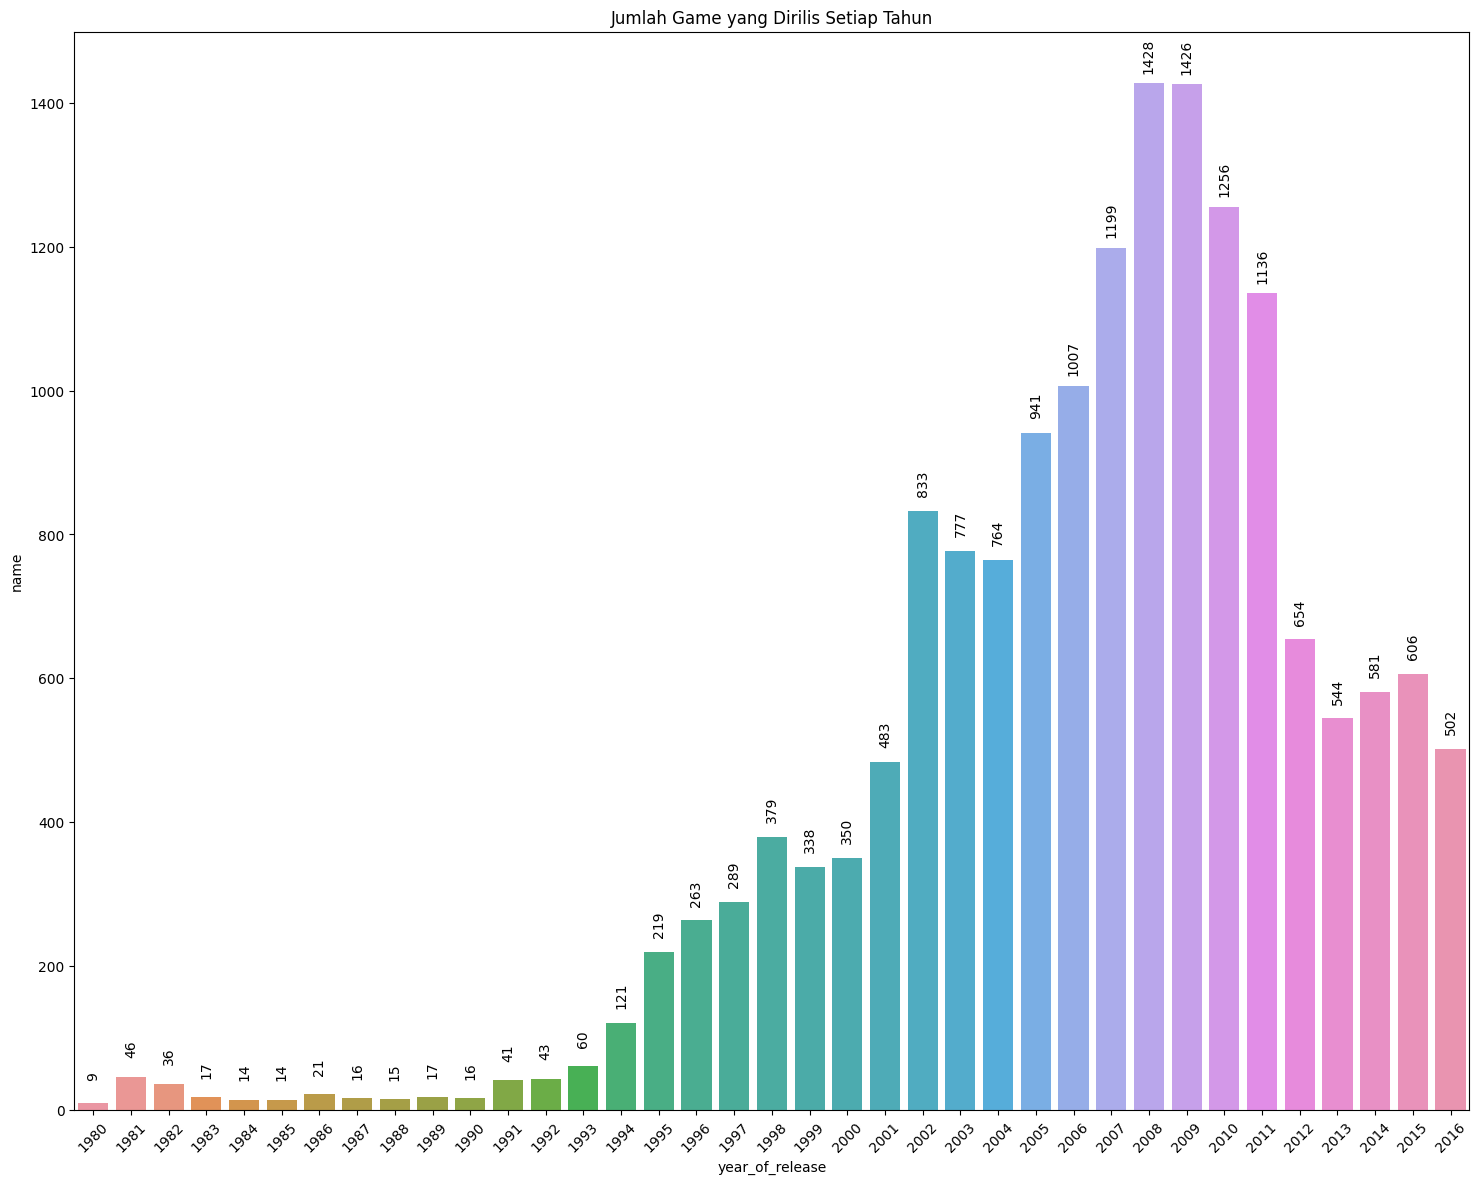

In [32]:
# Membuat grafiknya

plt.figure(figsize=(18,14))
splot = sns.barplot(data=yearly_game, x='year_of_release', y='name');
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.0f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', xytext = (0, 20), rotation=90, textcoords = 'offset points')
plt.title('Jumlah Game yang Dirilis Setiap Tahun')
plt.xticks(rotation = 45)
plt.show()

In [33]:
yearly_game.describe()

,year_of_release,name
count,37.000000,37.000000
mean,1998.000000,444.891892
std,10.824355,452.092713
min,1980.000000,9.000000
25%,1989.000000,36.000000
50%,1998.000000,338.000000
75%,2007.000000,764.000000
max,2016.000000,1428.000000


**Findings:**

- 1980 menjadi tahun dengan jumlah rilis game paling sedikit, yaitu hanya 9 judul game.
- Sedangkan tahun dengan jumlah rilis game paling banyak adalah pada tahun 2009 dengan 1427 judul game.
- Namun hingga tahun 2016 terjadi penurunan jumlah rilis tahunan menjadi hanya 502 judul game.

### Total Penjualan di Suatu Platform <a id='analysis2'></a>

Bagaimanakah distribus penjualan dari satu platform ke platform lainnya?

In [34]:
# Menghitung total sales

game_clean['total_sales'] = game_clean.iloc[:, -8:-4].sum(axis=1)

In [35]:
game_clean.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,39.47
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,30.38


In [36]:
# Membuat dataset yang berisikan informasi platform beserta nilai penjualannya

platform_sales = game_clean.groupby('platform').sum().sort_values(by='total_sales', ascending=False)['total_sales'].reset_index()

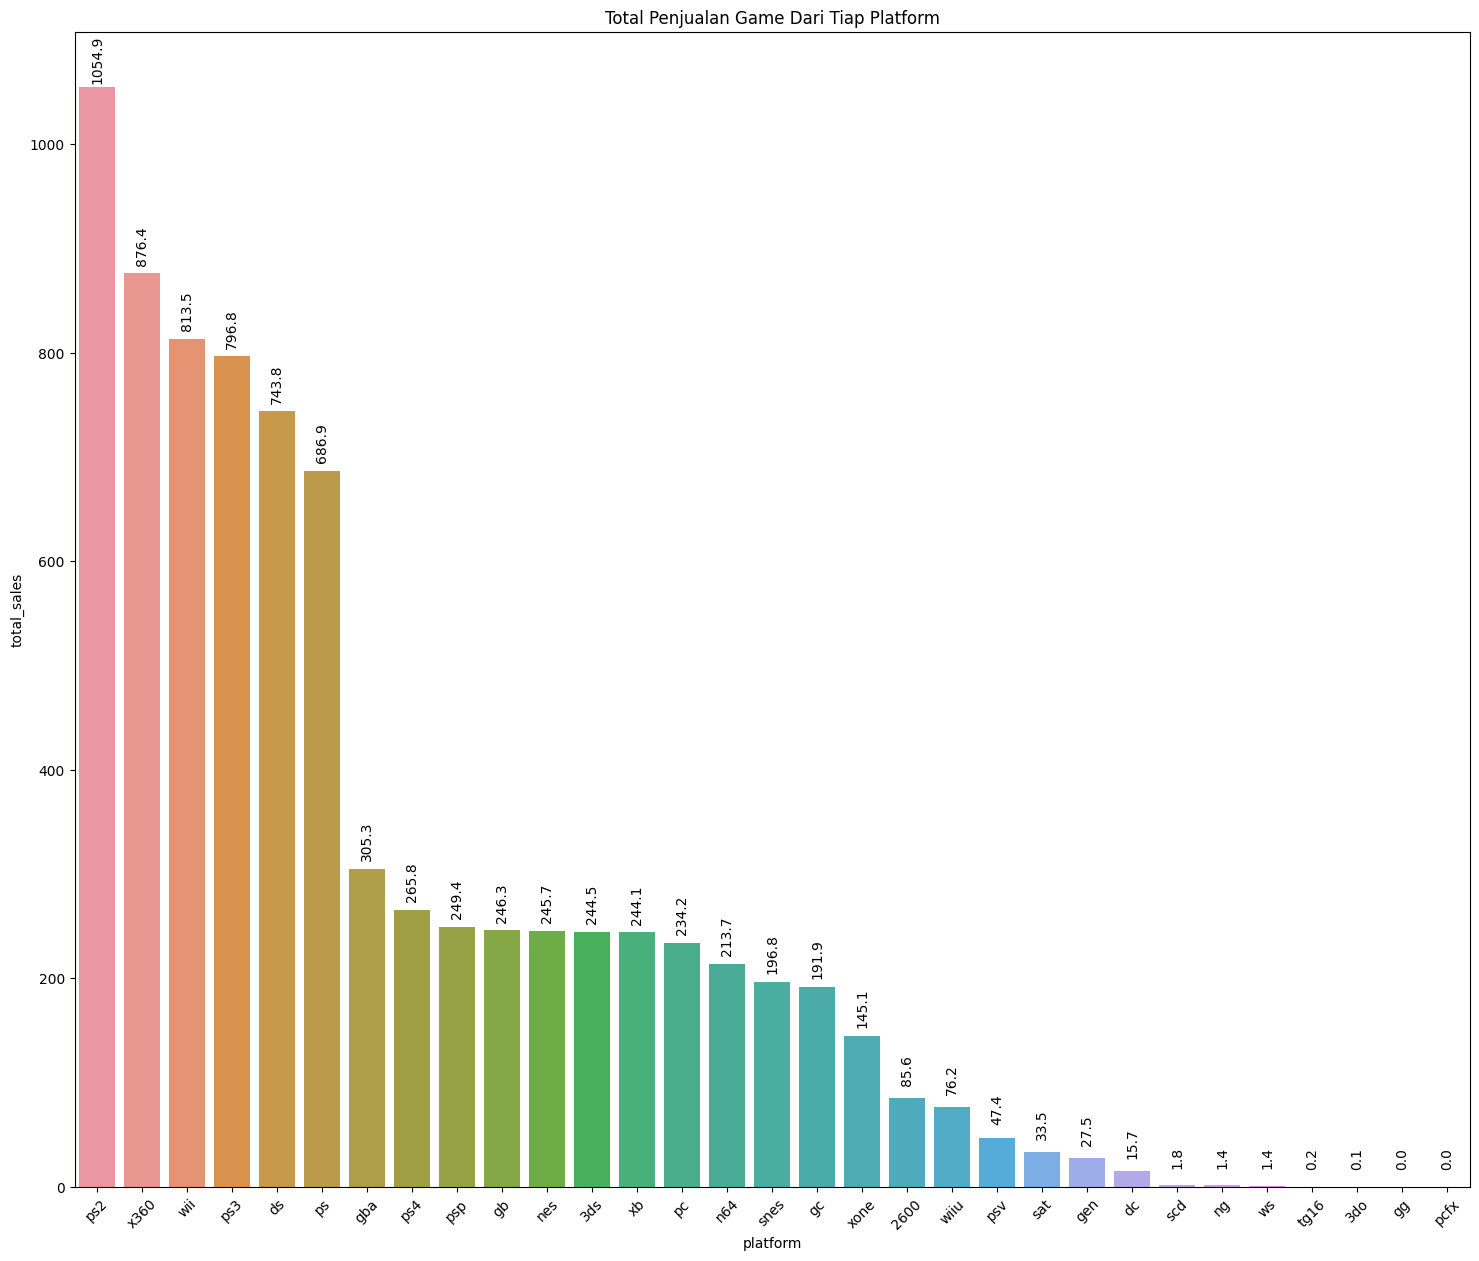

In [37]:
# Membuat grafiknya

plt.figure(figsize=(18,15))
splot = sns.barplot(data=platform_sales, x='platform', y='total_sales');
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', xytext = (0, 20), rotation=90, textcoords = 'offset points')
plt.title('Total Penjualan Game Dari Tiap Platform')
plt.xticks(rotation = 45)
plt.show()

**Findings:**

`ps2` merupakan platform dengan total penjualan tertinggi, sedangkan `pcfx` menjadi platform dengan total penjualan yang paling rendah diantara platform lainnya.

### Distribusi Platform Dengan Total Penjualan Terbesar <a id='analysis3'></a>

Mencari tahu platform yang dulu populer namun sekarang sudah tidak lagi populer dan berapa lama usia rata-rata suatu platform?

Untuk menemukannya perlu dilakukan pemfilteran data platform dengan total penjualan terbesar dengan membuang data yang mana jumlah penjualannya dibawah 30%.

In [38]:
# Memfiter platform dengan penjualan di atas 30 persen.

p30 = np.quantile(platform_sales['total_sales'], 0.30)
filtered_platform_sales = platform_sales.loc[platform_sales['total_sales'] > p30, 'platform']
filtered_platform_sales

0      ps2
1     x360
2      wii
3      ps3
4       ds
5       ps
6      gba
7      ps4
8      psp
9       gb
10     nes
11     3ds
12      xb
13      pc
14     n64
15    snes
16      gc
17    xone
18    2600
19    wiiu
20     psv
Name: platform, dtype: object

In [39]:
# Membuat dataset yang berisikan platform yang populer

popular_platform = game_clean.loc[(game['platform']).isin(filtered_platform_sales)]
popular_platform.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9589,the x-factor,ps3,2010,misc,0.00,0.10,0.00,0.03,NaN,NaN,NaN,0.10
3101,world of dragon warrior - torneko: the last hope,ps,1999,role-playing,0.02,0.01,0.58,0.04,NaN,NaN,NaN,0.61
4068,steel diver,3ds,2011,action,0.31,0.09,0.05,0.03,58.0,6.3,E10+,0.45
11498,tony hawk's pro skater 3,n64,2002,sports,0.06,0.02,0.00,0.00,NaN,NaN,NaN,0.08
11753,dynasty warriors 3,xb,2002,action,0.06,0.02,0.00,0.00,70.0,8.9,T,0.08


In [40]:
# Membuat dataset yang berisikan platform yang tidak populer

# Membuat pivot table
extinct_platform = pd.pivot_table(
    popular_platform, columns='year_of_release', index='platform', values='total_sales', aggfunc='sum'
).reset_index()

# Membuat daftar platform yang telah punah
extinct_platform_list = list(extinct_platform.loc[extinct_platform[2016].isna(), 'platform'])
print(extinct_platform_list)

# Membuat dataset yang berisikan platform yang telah punah
extinct_platform = game_clean.loc[(game['platform']).isin(extinct_platform_list)]
extinct_platform.sample(5)

['2600', 'ds', 'gb', 'gba', 'gc', 'n64', 'nes', 'ps', 'ps2', 'psp', 'snes', 'xb']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9963,thousand arms,ps,1998,role-playing,0.06,0.04,0.00,0.01,NaN,NaN,NaN,0.10
11036,jikkyou powerful pro yakyuu 9 ketteiban,ps2,2002,sports,0.00,0.00,0.09,0.00,NaN,NaN,NaN,0.09
1508,nba live 07,ps2,2006,sports,1.07,0.04,0.02,0.17,63.0,6.0,E,1.13
11467,toradora portable!,psp,2009,adventure,0.00,0.00,0.08,0.00,NaN,NaN,NaN,0.08
13390,full spectrum warrior: ten hammers,xb,2006,strategy,0.03,0.01,0.00,0.00,69.0,NaN,M,0.04


In [41]:
# Membuat pivot table

pivot_extinct_platform = pd.pivot_table(
    extinct_platform, columns='platform', index='year_of_release', values='total_sales', aggfunc='sum'
).reset_index()
pivot_extinct_platform.head()

platform,year_of_release,2600,ds,gb,gba,gc,n64,nes,ps,ps2,psp,snes,xb
0,1980,11.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981,35.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1982,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1983,5.78,NaN,NaN,NaN,NaN,NaN,10.88,NaN,NaN,NaN,NaN,NaN
4,1984,0.27,NaN,NaN,NaN,NaN,NaN,49.38,NaN,NaN,NaN,NaN,NaN


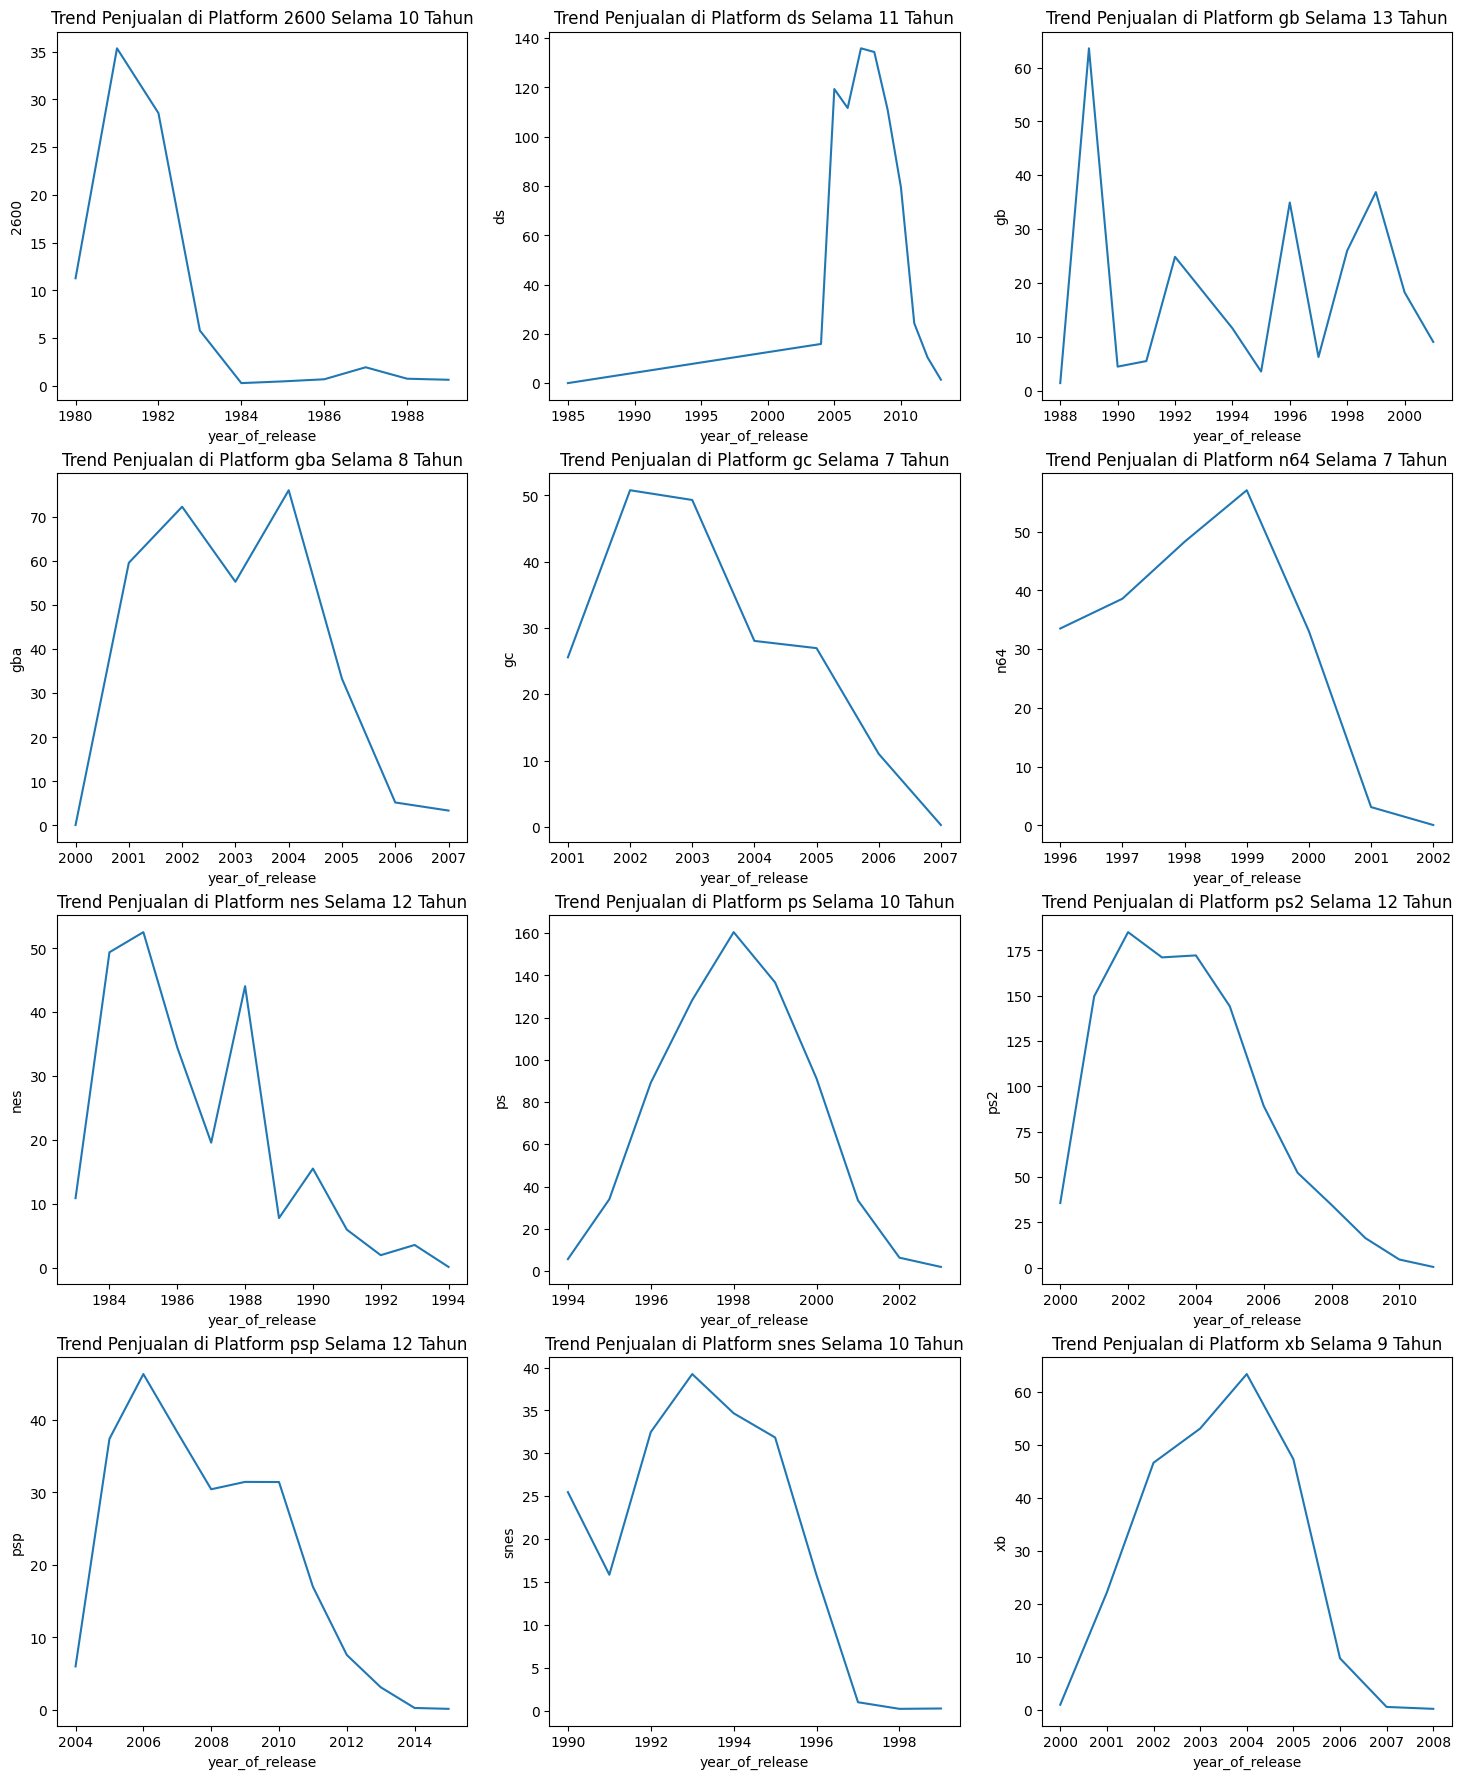

In [42]:
# Membuat Grafiknya

plt.figure(figsize=(18, 22))
i = 1
for platform in extinct_platform_list:
    year_count = pivot_extinct_platform[platform].count()
    plt.subplot(4, 3, i)
    plt.title(f'Trend Penjualan di Platform {platform} Selama {year_count} Tahun')
    sns.lineplot(data=pivot_extinct_platform, x='year_of_release', y=platform)
    i = i + 1
    
plt.show()

In [43]:
# Rata-rata usia platform

pivot_extinct_platform.drop('year_of_release', axis=1).count().mean()

10.083333333333334

**Findings:**

- `ps2`, `ps`, `ds`, `gba`, `psp`, `gb`, `xb`, `gc`, `n64`, `nes` dan, `snes` merupakan platform yang dulu populer namun sekarang sudah punah. 
- Rata-rata usia platform adalah 10 tahun.

**Insights:**

- Usia suatu platform dapat dijadikan pertimbangan untuk merilis game pada platform tersebut, semakin tua usia platform maka semakin tinggi kemungkinan platform tersebut tidak populer.

**Recomendation:**

- Jika ingin membuat game alangkah baiknya untuk mempertimbangkan usia platformnya, apakah usia platformnya mendekati telah usia rata-rata.
- Rilis game ketika usia platform di bawah 5 tahun, karena tahun-tahun tersebut merupakan puncak popularitas suatu platform.

### Platform Potensial <a id='analysis4'></a>

Sebelum melanjutkan analisa lebih lanjut, perlu dilakukan pemfilteran data yang hanya berisikan data penjualan 4 tahun terakhir, hal ini dilakukan agar data yang dihasilkan lebih relevan.

In [44]:
# Membuat dataset baru yang berisikan data game 4 tahun terakhir

latest_game = game_clean[game_clean['year_of_release'] >= 2013].reset_index(drop=True)
latest_game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,17.09
1,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,14.86
2,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,12.25
3,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,13.82
4,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65


Platform mana yang memiliki penjualan terbanyak?

In [45]:
latest_platform_sales = latest_game.groupby(['platform']).sum().sort_values(
    by='total_sales', ascending=False
)['total_sales'].reset_index()

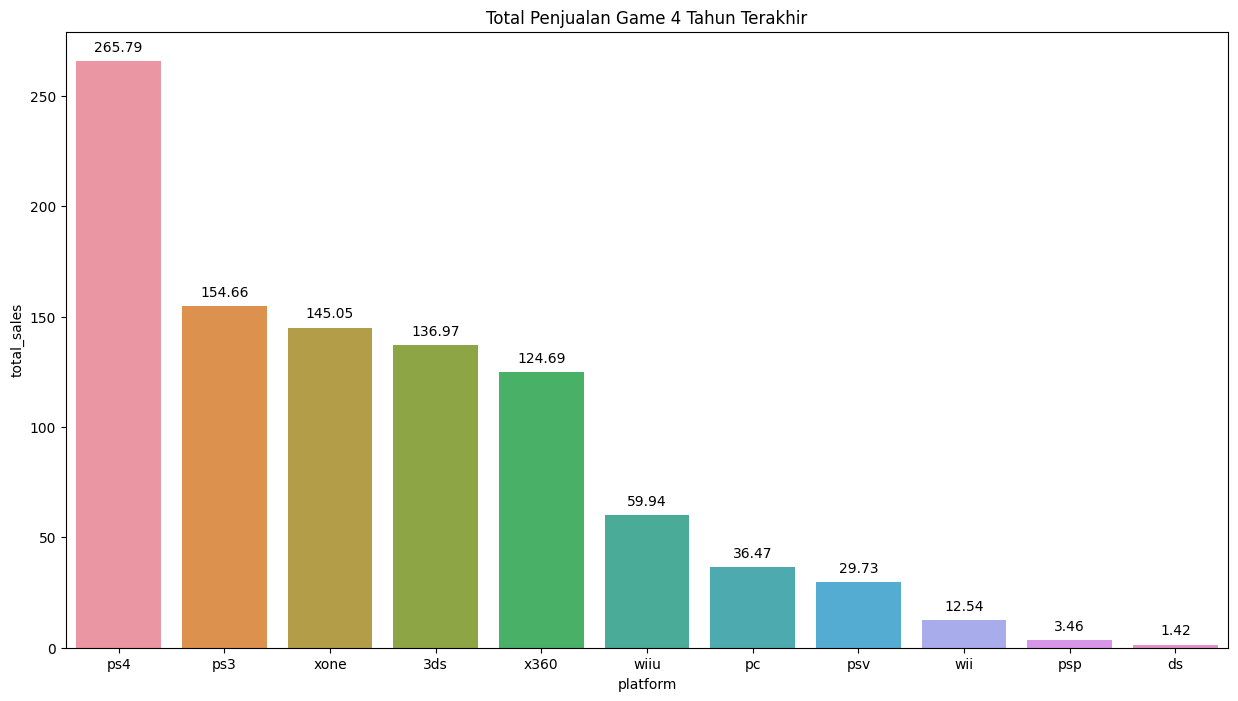

In [46]:
# Membuat grafiknya

plt.figure(figsize=(15,8))
splot = sns.barplot(data=latest_platform_sales, x='platform', y='total_sales');
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.2f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Total Penjualan Game 4 Tahun Terakhir')
plt.show()

**Findings:**

- Jumlah platform yang masih menghasilkan penjualan dalam 5 tahun terakhir hanya berjumah 11 patform.
- Dalam kurun waktu 5 tahun terakhir, `ps4` merupakan platform dengan total penjualan tertinggi sedangkan `ds` menjadi platform dengan total penjualan yang paling rendah diantara platform lainnya.


**Insights:**

- `ps4`, `ps3`, dan `xone` menjadi platform yang paling berpotensi menghasilkan keuntungan.
- `wii`, `psp`, dan `ds` merupakan platform yang perkembangannya negatif atau menyusut.

**Recomendation:**

- Rilis game di platform `ps4`, `ps3`, dan `xone` karena  dalam 5 tahun terakhir total penjualannya masih tinggi.

### Penjualan Global <a id='analysis5'></a>

Bagaimana dengan penjualan rata-rata pada berbagai platform? Apakah perbedaan penjualannya signifikan?

In [47]:
# Membuat dataset yang berisikan informasi platform, total penjualan, dan tahun rilisnya

# Dataset penjualan
global_sales = pd.pivot_table(data=game_clean, index='platform', values='total_sales', aggfunc='mean').reset_index()

# Dataset tahun rilis
release_year = pd.pivot_table(data=game_clean, index='platform', values='year_of_release', aggfunc='min').reset_index()

# Menggabungkan kedua dataset 
global_sales.merge(release_year, how='inner', on='platform').sort_values('total_sales', ascending=False)

,platform,total_sales,year_of_release
5,gb,2.538866,1988
11,nes,2.507551,1983
8,gen,1.017037,1990
23,snes,0.823515,1990
0,2600,0.738276,1980
28,x360,0.710219,2005
18,ps4,0.678036,2013
10,n64,0.676266,1996
25,wii,0.632558,2006
17,ps3,0.610069,2006


In [48]:
# Membuat data boxplot

boxplot_data = game_clean[['name', 'platform', 'total_sales']]

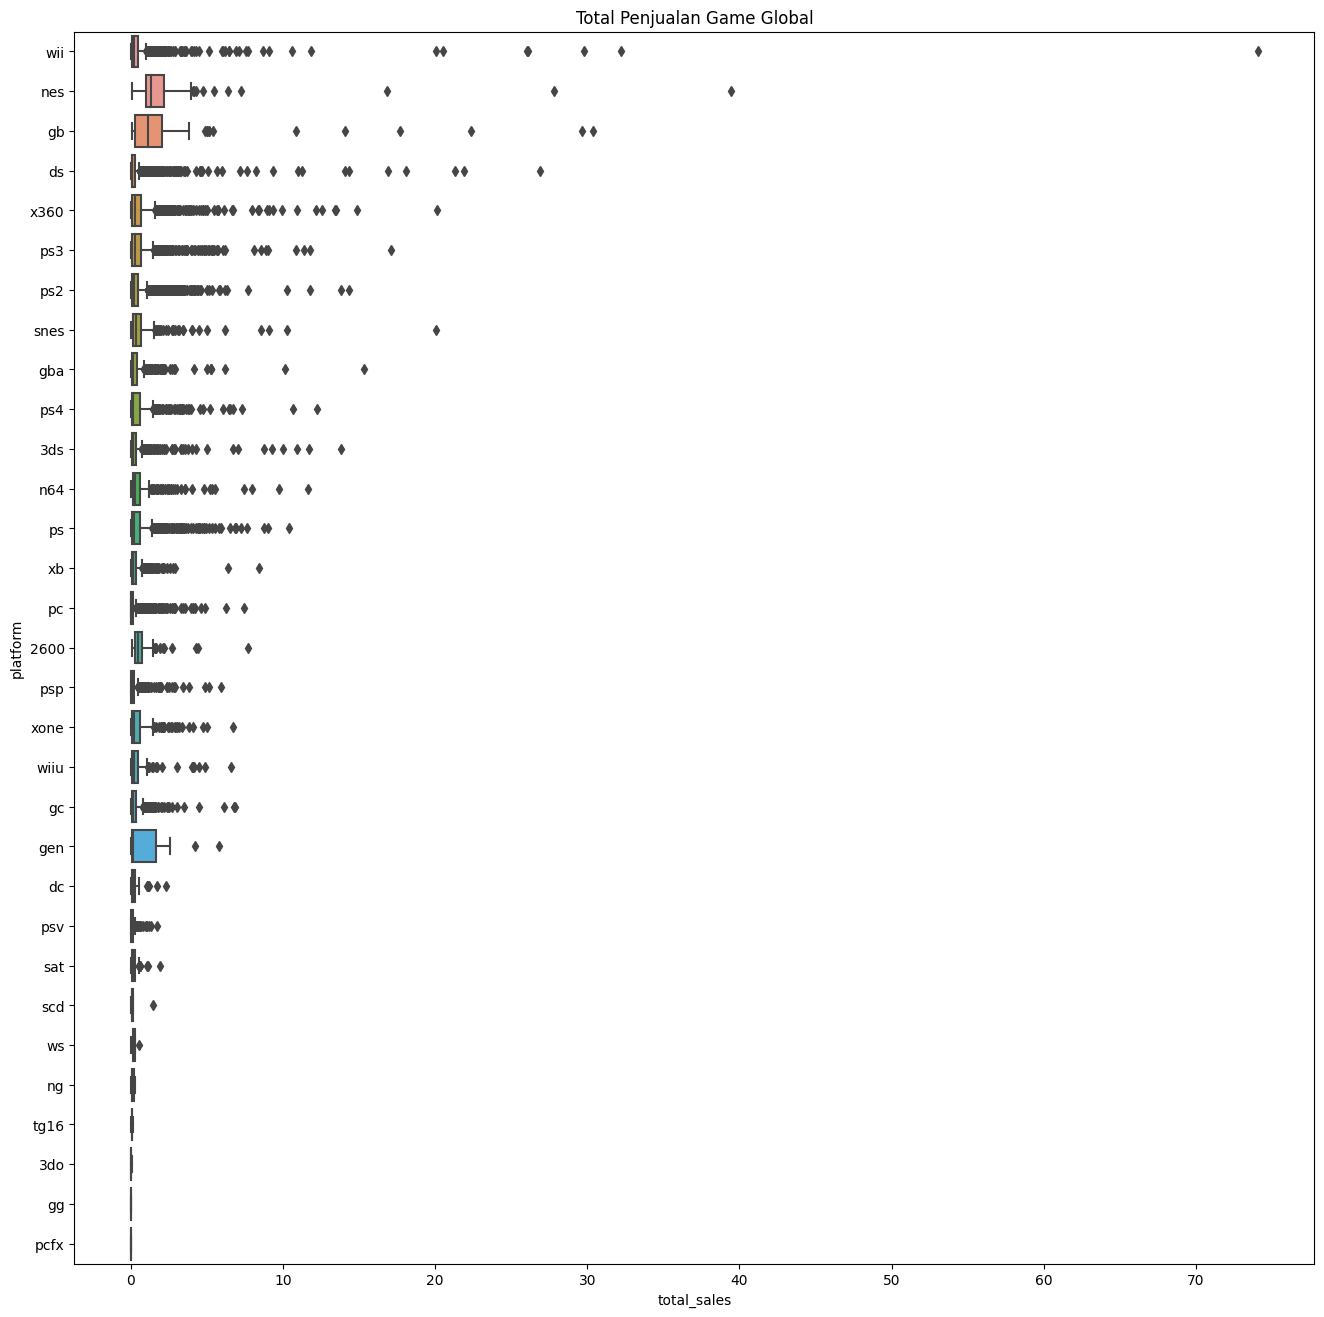

In [49]:
# Membuat Boxplot

plt.figure(figsize=(16, 16))
sns.boxplot(data=boxplot_data, x='total_sales', y='platform')
plt.title('Total Penjualan Game Global')
plt.show() 

Dikarenakan *outlier* yang cukup signifikan menjadikan visualisasi datanya sulit dibaca, untuk memperbaikinya perlu dilakukan pemfilteran data dengan hanya memasukan *percentile* kurang dari 99.

In [50]:
# Membuat percentile 90
p99 = np.percentile(boxplot_data['total_sales'], 99)

# Membuat ulang data boxplot
boxplot_data = boxplot_data.loc[boxplot_data['total_sales'] < p99]

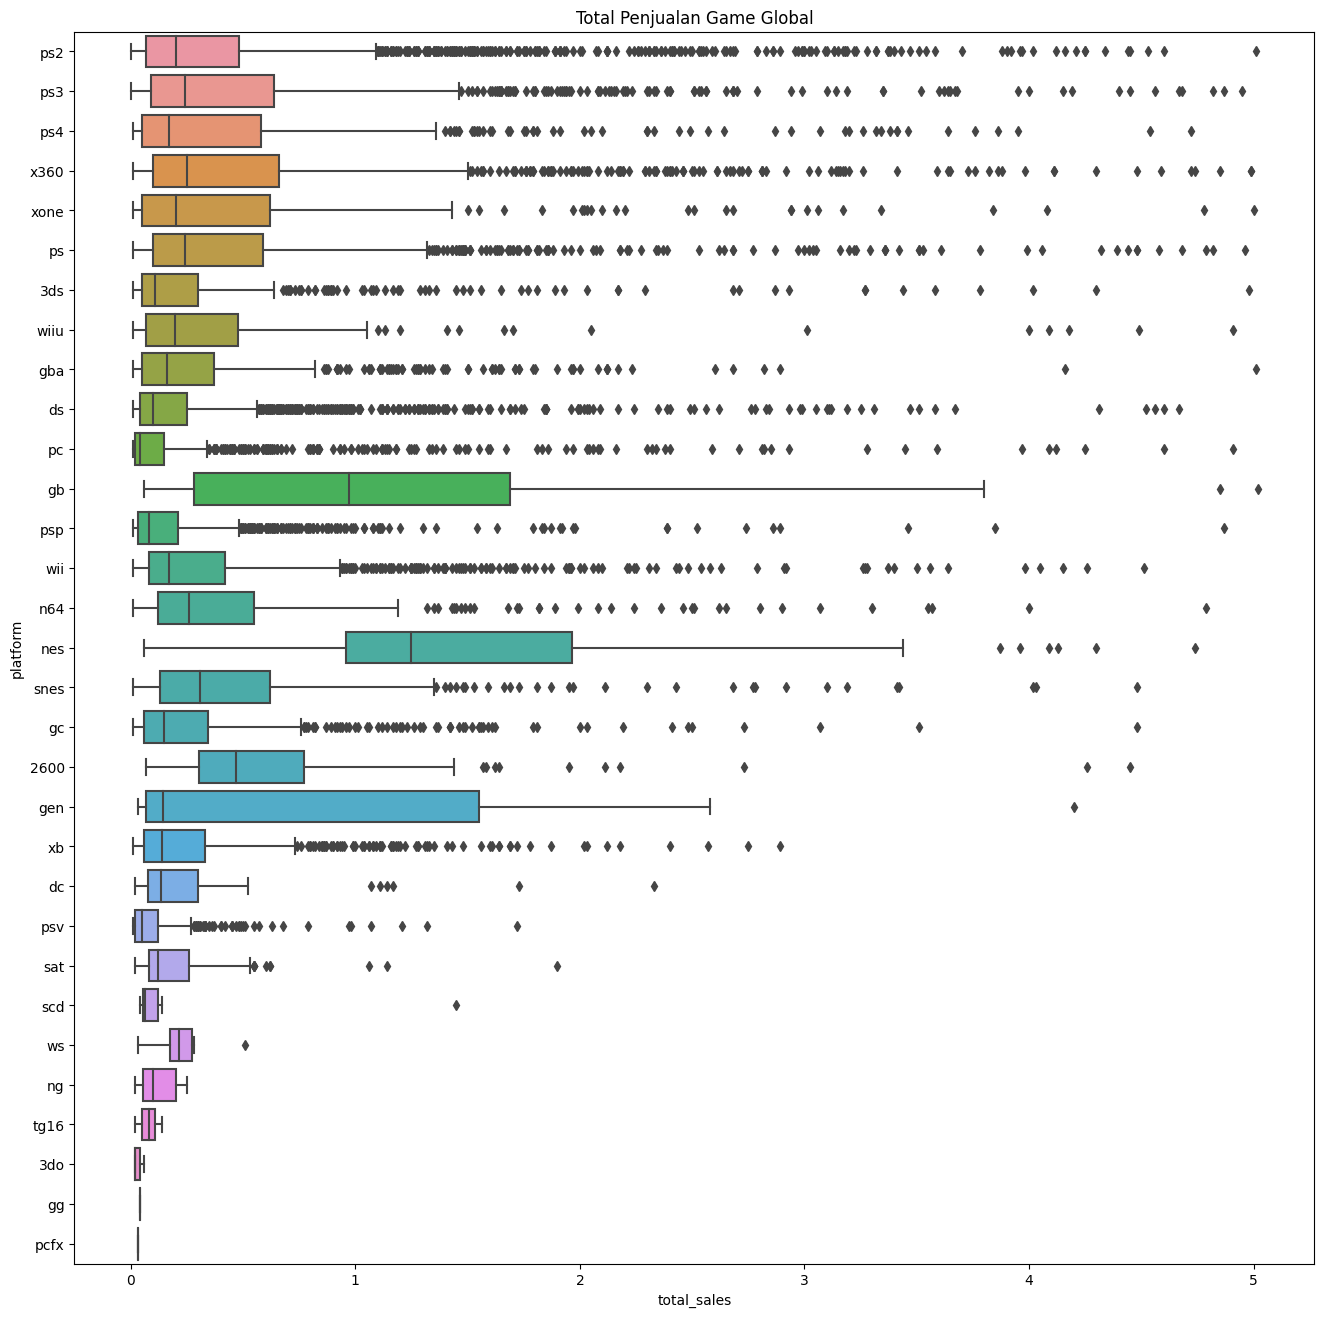

In [51]:
plt.figure(figsize=(16, 16))
sns.boxplot(data=boxplot_data, x='total_sales', y='platform')
plt.title('Total Penjualan Game Global')
plt.show() 

**Findings:**

- Platform `gb` menghasilkan rata-rata penjualan paling besar yaitu sekitar 2.62 juta USD.
- `pcfx` menghasilkan rata-rata penjualan terendah dengan total penjualan hanya sebesar 0.03 juta USD.

### Korelasi Ulasan Terhadap Penjualan <a id='analysis6'></a>

Lihatlah bagaimana ulasan pengguna dan para profesional memengaruhi penjualan pada salah satu platform populer (yang Anda pilih). Buatlah sebuah scatter plot dan hitung korelasi antara ulasan dan penjualan. Tarik kesimpulannya.

In [52]:
# Menggunakan dataset yang berisikan data game 4 tahun terakhir

latest_game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,17.09
1,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,14.86
2,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,12.25
3,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,13.82
4,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65


#### PS4 <a id='ps4'></a>

In [53]:
# Membuat dataset yang hanya berisikan data PS4

ps4_corr = latest_game.groupby(['platform', 'name'])['total_sales', 'critic_score', 'user_score'].sum(
).query('platform == "ps4" & critic_score > 0 & user_score > 0').reset_index()
ps4_corr.sample(5)

,platform,name,total_sales,critic_score,user_score
205,ps4,terraria,0.06,83.0,7.9
95,ps4,just dance 2016,0.30,73.0,6.8
49,ps4,disgaea 5: alliance of vengeance,0.25,80.0,8.1
69,ps4,fairy fencer f: advent dark force,0.07,71.0,6.2
165,ps4,rayman legends,0.86,90.0,8.5


In [54]:
# Melihat korelasinya

ps4_corr.corr()['total_sales']

total_sales     1.000000
critic_score    0.405223
user_score     -0.032923
Name: total_sales, dtype: float64

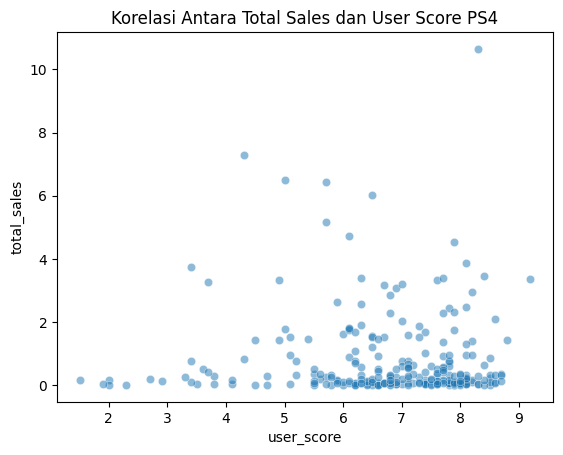

In [55]:
# Membuat scatter plot 'user_score'

plt.title('Korelasi Antara Total Sales dan User Score PS4')
sns.scatterplot(data=ps4_corr, x='user_score', y='total_sales', alpha=0.5)
plt.show()

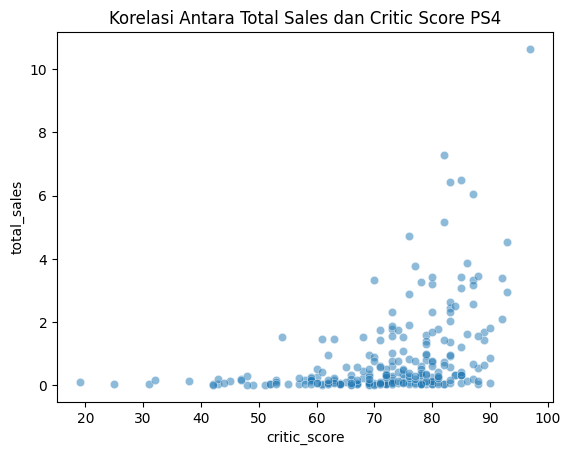

In [56]:
# Membuat scatter plot 'critic_score'

plt.title('Korelasi Antara Total Sales dan Critic Score PS4')
sns.scatterplot(data=ps4_corr, x='critic_score', y='total_sales', alpha=0.5)
plt.show()

**Findings:**

- `critic_score` memiliki korelasi positif yang tidak terlalu kuat yaitu sebesar 40%.
- Sedangkan `user_score` berkorelasi negatif -3% yang dapat diartikan tidak memiliki korelasi sama sekali.

#### PS3 <a id='ps3'></a>

In [57]:
# Membuat dataset yang hanya berisikan data PS3

ps3_corr = latest_game.groupby(['platform', 'name'])['total_sales', 'critic_score', 'user_score'].sum(
).query('platform == "ps3" & critic_score > 0 & user_score > 0').reset_index()
ps3_corr.sample(5)

,platform,name,total_sales,critic_score,user_score
59,ps3,jojo's bizarre adventure: all star battle,0.57,71.0,8.3
56,ps3,hitman: hd trilogy,0.16,71.0,7.6
88,ps3,pro evolution soccer 2014,0.95,78.0,4.1
104,ps3,the awakened fate ultimatum,0.02,65.0,7.3
51,ps3,grand theft auto v,17.09,97.0,8.2


In [58]:
# Melihat korelasinya

ps3_corr.corr()['total_sales']

total_sales     1.000000
critic_score    0.336898
user_score      0.021034
Name: total_sales, dtype: float64

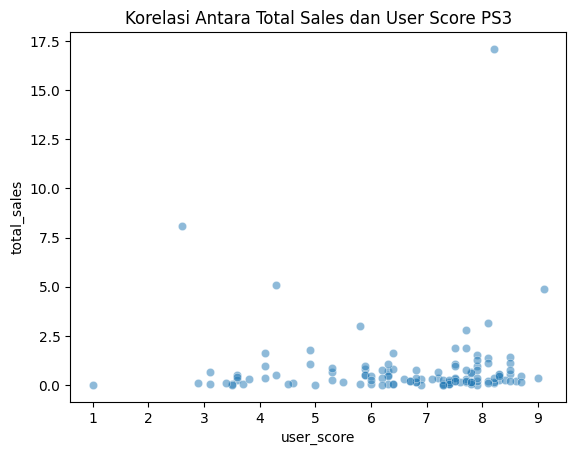

In [59]:
# Membuat scatter plot 'user_score'

plt.title('Korelasi Antara Total Sales dan User Score PS3')
sns.scatterplot(data=ps3_corr, x='user_score', y='total_sales', alpha=0.5)
plt.show()

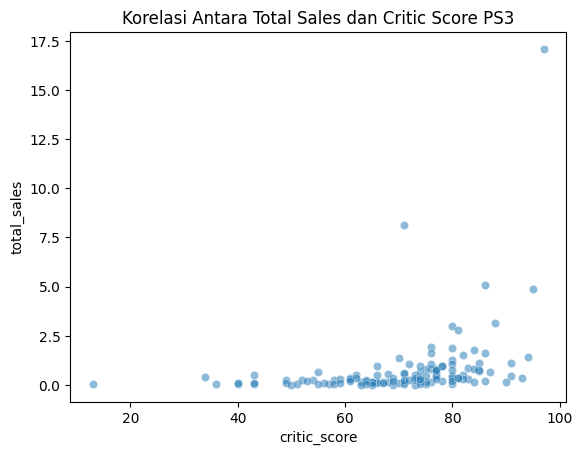

In [60]:
# Membuat scatter plot 'critic_score'

plt.title('Korelasi Antara Total Sales dan Critic Score PS3')
sns.scatterplot(data=ps3_corr, x='critic_score', y='total_sales', alpha=0.5)
plt.show()

**Findings:**

- `critic_score` memiliki korelasi positif yang tidak terlalu kuat yaitu sebesar 33%.
- Sedangkan `user_score` berkorelasi sangat lemah hanya sekitar 2% yang dapat diartikan tidak memiliki korelasi sama sekali.

#### XOne <a id='xone'></a>

In [61]:
# Membuat dataset yang hanya berisikan data XOne

xone_corr = latest_game.groupby(['platform', 'name'])['total_sales', 'critic_score', 'user_score'].sum(
).query('platform == "xone" & critic_score > 0 & user_score > 0').reset_index()
xone_corr.sample(5)

,platform,name,total_sales,critic_score,user_score
69,xone,lego batman 3: beyond gotham,0.40,74.0,7.1
51,xone,forza horizon 2,1.29,86.0,8.2
93,xone,nba 2k17,0.92,90.0,6.2
116,xone,resident evil 6,0.04,63.0,6.3
126,xone,shape up,0.17,58.0,8.3


In [62]:
# Melihat korelasinya

xone_corr.corr()['total_sales']

total_sales     1.000000
critic_score    0.410657
user_score     -0.093737
Name: total_sales, dtype: float64

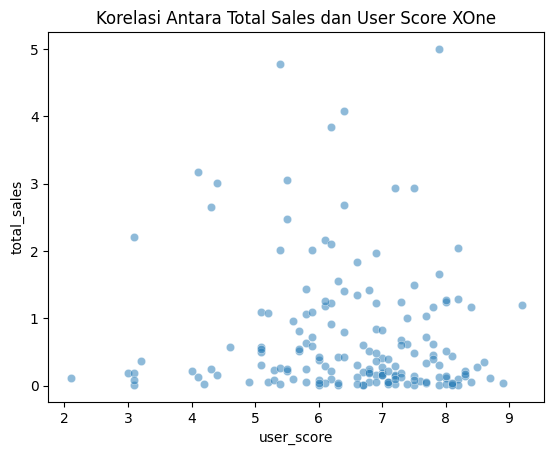

In [63]:
# Membuat scatter plot 'user_score'

plt.title('Korelasi Antara Total Sales dan User Score XOne')
sns.scatterplot(data=xone_corr, x='user_score', y='total_sales', alpha=0.5)
plt.show()

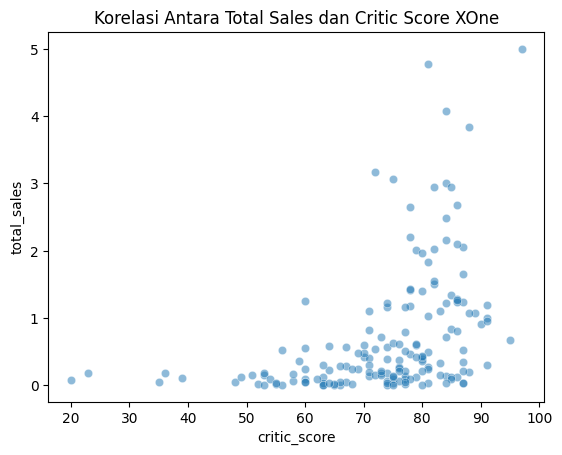

In [64]:
# Membuat scatter plot 'critic_score'

plt.title('Korelasi Antara Total Sales dan Critic Score XOne')
sns.scatterplot(data=xone_corr, x='critic_score', y='total_sales', alpha=0.5)
plt.show()

**Findings:**

- `critic_score` memiliki korelasi positif yang tidak terlalu kuat yaitu sebesar 41%.
- Sedangkan `user_score` berkorelasi negatif -9% yang dapat diartikan hampir tidak memiliki korelasi sama sekali.

#### Kesimpulan <a id='con1'></a>

**Findings:**

- Berdasarkan 3 platform teratas yang paling populer, `critic_score` memiliki korelasi positif yang tidak terlalu kuat yaitu sebesar 30-40%.
- Sedangkan `user_score` hampir tidak memiliki korelasi sama sekali.

**Insights:**

- Ulasan pengguna tidak mempengaruhi penjualan sama sekali.
- Ulasan kritikus sedikit berpengaruh terhadap penjualan suatu game.

**Recomendation:**

- Ada baiknya mempertimbangkan ulasan kritikus untuk memicu penjualan yang lebih tinggi.

### Genre yang Paling Menguntungkan <a id='analysis7'></a>

Mengamati distribusi umum suatu game berdasarkan genre:

#### Jumlah Game Berdasarkan Genre <a id='game'></a>

In [65]:
# Menghitung jumlah game tiap genre

genre_count = latest_game['genre'].value_counts().reset_index()

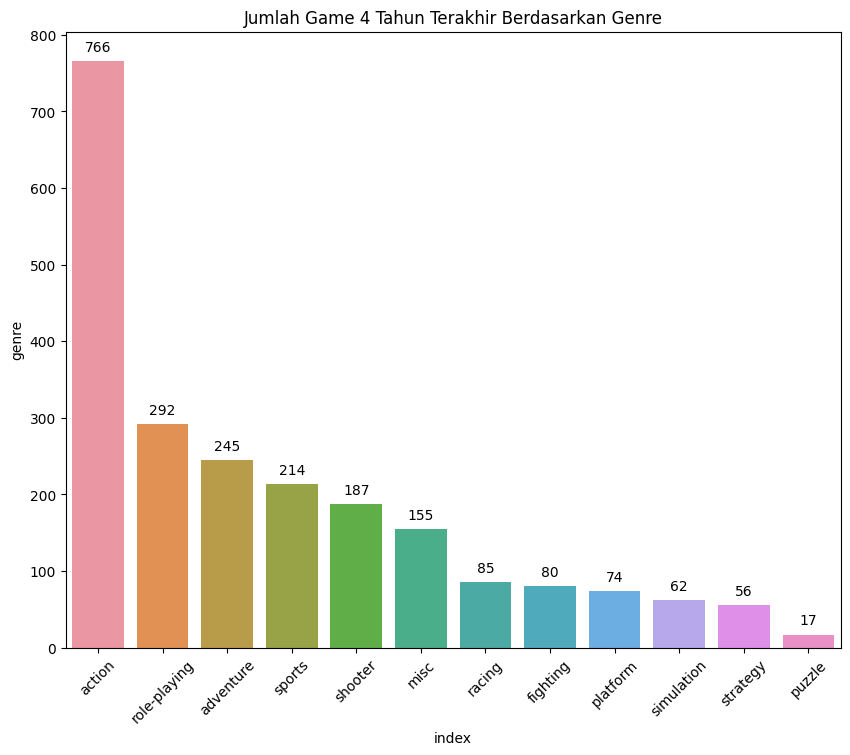

In [66]:
# Jumlah game tiap genre

plt.figure(figsize=(10,8))
splot = sns.barplot(data=genre_count, x='index', y='genre');
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.0f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Jumlah Game 4 Tahun Terakhir Berdasarkan Genre')
plt.xticks(rotation = 45)
plt.show()

#### Jumlah Penjualan Berdasarkan Genre <a id='sales'></a>

In [67]:
# Menghitung total penjualan berdasarkan genre

genre_global_sales = latest_game.groupby(['genre']).sum().sort_values(
    by='total_sales', ascending=False
)['total_sales'].reset_index()

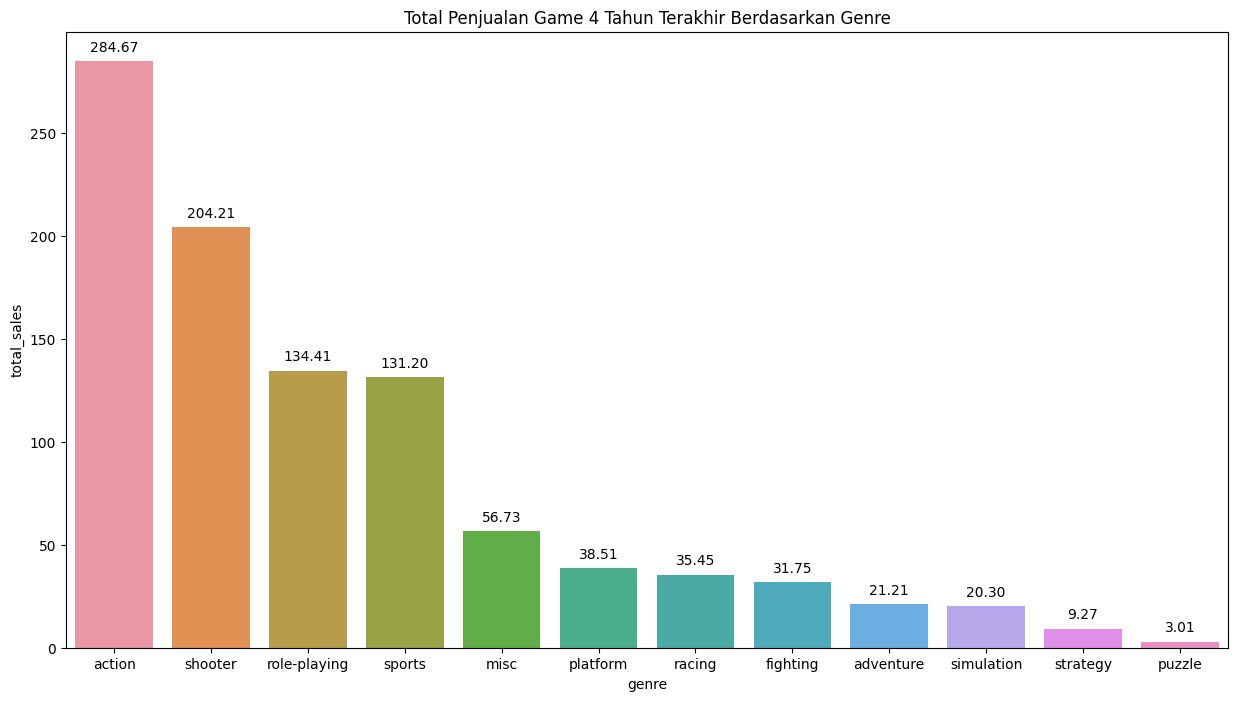

In [68]:
# Membuat grafiknya

plt.figure(figsize=(15,8))
splot = sns.barplot(data=genre_global_sales, x='genre', y='total_sales');
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.2f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Total Penjualan Game 4 Tahun Terakhir Berdasarkan Genre')
plt.show()

#### Kesimpulan <a id='con2'></a>

**Findings:**

- Dalam 4 tahun terakhir, genre `action` merupakan genre yang paling populer dikarenakan jumlah judul yang sangat signifikan dibandingkan genre lainnya dengan 766 judul game disusul dengan genre `role-playing` sebanyak 292 judul dan 245 judul bergenre `adventure`.
- Sedangkan genre `puzzle` menjadi genre dengan judul rilis yang paling sedikit, yaitu hanya 17 judul game dan genre `strategy` berada tepat diposisi atasnya sebanyak 56 judul game.
- Dengan judul game terbanyak, genre `action` juga menghasilkan total penjualan paling banyak. Uniknya, genre `shooter` menempati posisi nomor 2 penghasilan terbesar dilanjutkan dengan `sports` kemudian barulah pada posisis ke-4 ditempati oleh genre `role-playing`. 
- Namun genre `puzzle` tetap pada posisi terakhir.

**Insights:**

- Genre `action` menjadi genre paling populer.
- Meskipun genre `shooter` tidak memiliki judul game sebanyak genre `action`, tetapi nilai penjualnnya tidak kalah menarik.

**Recomendation:**

- Pertimbangkan untuk membuat game dengan genre `action` dan `shooter` karena kedua genre ini adalah genre yang paling populer dan menghasilkan paling banyak penjualan.

## Tahap 5: Pemprofilan Pengguna <a id='profile'></a>

### Platform Teratas <a id='profile1'></a>

Platform manakah yang termasuk ke dalam 5 platform teratas dalam 4 tahun terakhir?

Untuk menjawabnya perlu dilakukan pememeriksaan variasi pangsa pasar dari satu wilayah ke wilayah lainnya berdasarkan platform.

In [69]:
# Membuat List platform

platforms = latest_game['platform'].unique()
platforms = platforms[~pd.isnull(platforms)]
platforms

array(['ps3', 'x360', 'ps4', '3ds', 'xone', 'wiiu', 'wii', 'pc', 'psv',
       'ds', 'psp'], dtype=object)

In [70]:
# Membuat pivot table yang berisikan informasi platform dan nilai penjualannya di tiap wilayah

platform_sales = pd.pivot_table(latest_game, index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum').T.reset_index()
platform_sales

platform,index,3ds,ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
0,eu_sales,30.96,0.85,25.36,67.81,141.09,0.17,6.10,5.93,19.85,42.52,51.59
1,jp_sales,67.81,0.00,0.00,23.35,15.96,3.29,18.59,0.05,10.88,0.51,0.34
2,na_sales,38.20,0.57,11.11,63.50,108.74,0.00,5.04,6.56,29.21,81.66,93.12
3,other_sales,6.28,0.12,2.96,26.77,48.35,0.04,3.26,1.12,4.69,12.11,14.27


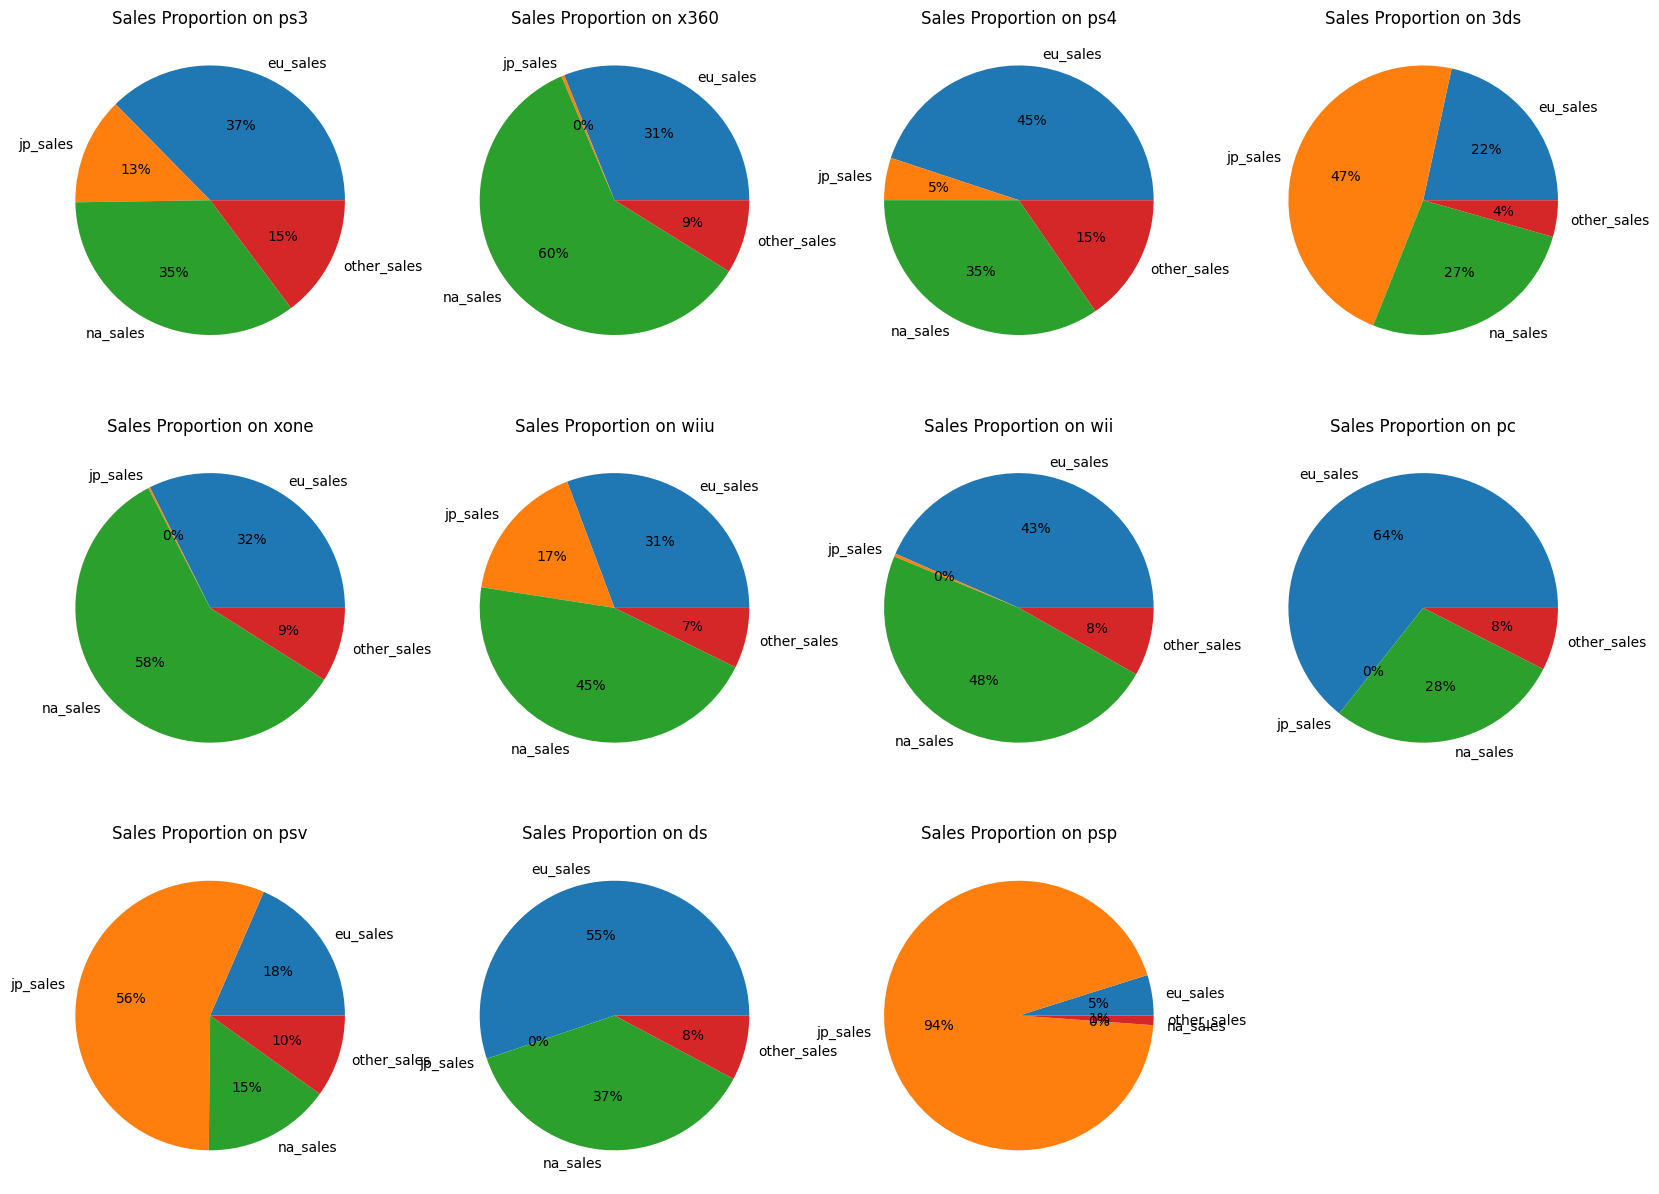

In [71]:
i = 1
plt.figure(figsize=(20, 15))

# Membuat pie chart
for platform in platforms:
    plt.subplot(3, 4, i)
    plt.title(f'Sales Proportion on {platform}')
    plt.pie(platform_sales[platform], labels=platform_sales['index'], autopct='%.0f%%')
    i = i + 1 
    
plt.show()

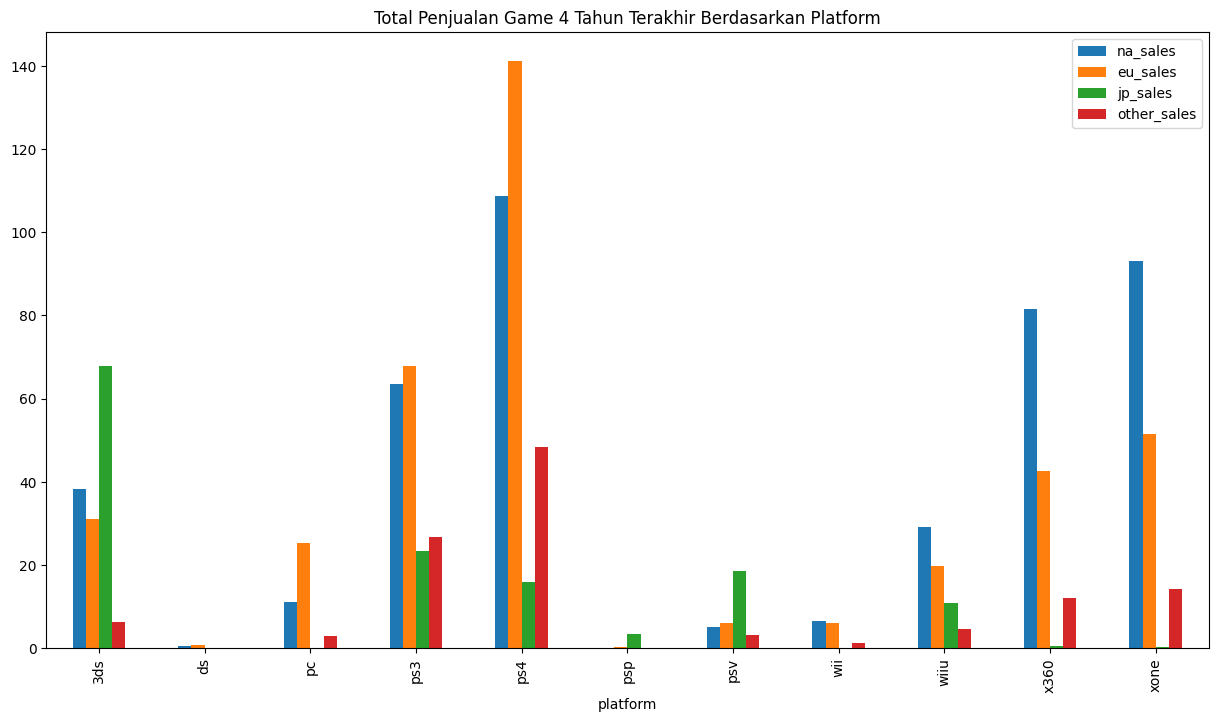

In [72]:
# Membuat barplot

# Membuat dataset
platform_barplot = latest_game.groupby(['platform'])['na_sales', 'eu_sales','jp_sales', 'other_sales'].sum()

# Menampilkan barplot
platform_barplot.plot(kind='bar', figsize=(15, 8));
plt.title('Total Penjualan Game 4 Tahun Terakhir Berdasarkan Platform')
plt.show()

**Findings:**

- 5 platform teratas dalam 4 tahun terakhir secara berurutan dari peringkat satu adalah `PS4`, `XOne`, `X360`, `PS3`, dan `3DS`.
- Penjualan tertinggi di platform `PS4` berasal dari wilayah Eropa, yaitu sebesar 45%.
- Penjualan tertinggi di platform `XOne` berasal dari wilayah Amerika Utara, yaitu sebesar 58%.
- Penjualan tertinggi di platform `X360` berasal dari wilayah Amerika Utara, yaitu sebesar 60%.
- Penjualan tertinggi di platform `PS3` berasal dari wilayah Eropa, yaitu sebesar 37%.
- Penjualan tertinggi di platform `3DS` berasal dari wilayah Jepang, yaitu sebesar 47%.
- Dalam 4 tahun terakhir hanya wilayah jepang yang masih menghasilkan penjualan di platform `PSP` secara signifikan degan proporsi sebanyak 94%.

**Insights:**

- Platform yang diminati di wilayah Eropa adalah `PS4` dan `PS3`.
- Platform yang diminati di wilayah Amerika Utara adalah `XOne` dan `X360`.
- Platform yang diminati di wilayah Jepang adalah `3DS`.

**Recomendation:**

- Jika akan merilis game di wilayah Eropa, maka `PS4` dan `PS3` milik Playstation adalah platform yang perlu dipertimbangkan.
- Jika akan merilis game di wilayah Amerika Utara, maka `XOne` dan `X360` milik Microsoft adalah platform yang perlu dipertimbangkan.
- Sedangkan jika akan merilis game di wilayah Jepang, maka `3DS` milik Nintendo adalah platform yang perlu dipertimbangkan.

### Genre Teratas <a id='profile2'></a>

In [73]:
# Membuat List genre

genres = latest_game['genre'].unique()
genres

array(['action', 'shooter', 'role-playing', 'misc', 'sports', 'fighting',
       'racing', 'simulation', 'platform', 'strategy', 'adventure',
       'puzzle'], dtype=object)

In [74]:
# Membuat pivot table yang berisikan informasi genre dan nilai penjualannya di tiap wilayah

genre_sales = pd.pivot_table(latest_game, index='genre', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum').T.reset_index()
genre_sales

genre,index,action,adventure,fighting,misc,platform,puzzle,racing,role-playing,shooter,simulation,sports,strategy
0,eu_sales,118.13,8.25,8.55,20.04,15.58,1.00,20.19,36.97,87.86,10.92,60.52,4.22
1,jp_sales,40.49,5.82,7.65,9.20,4.79,1.18,2.30,51.04,6.61,4.52,5.41,1.77
2,na_sales,126.05,7.14,15.55,27.49,18.14,0.83,12.96,46.40,109.74,4.86,65.27,3.28
3,other_sales,37.20,2.43,3.56,6.09,4.12,0.16,4.44,11.48,28.77,1.46,19.45,0.81


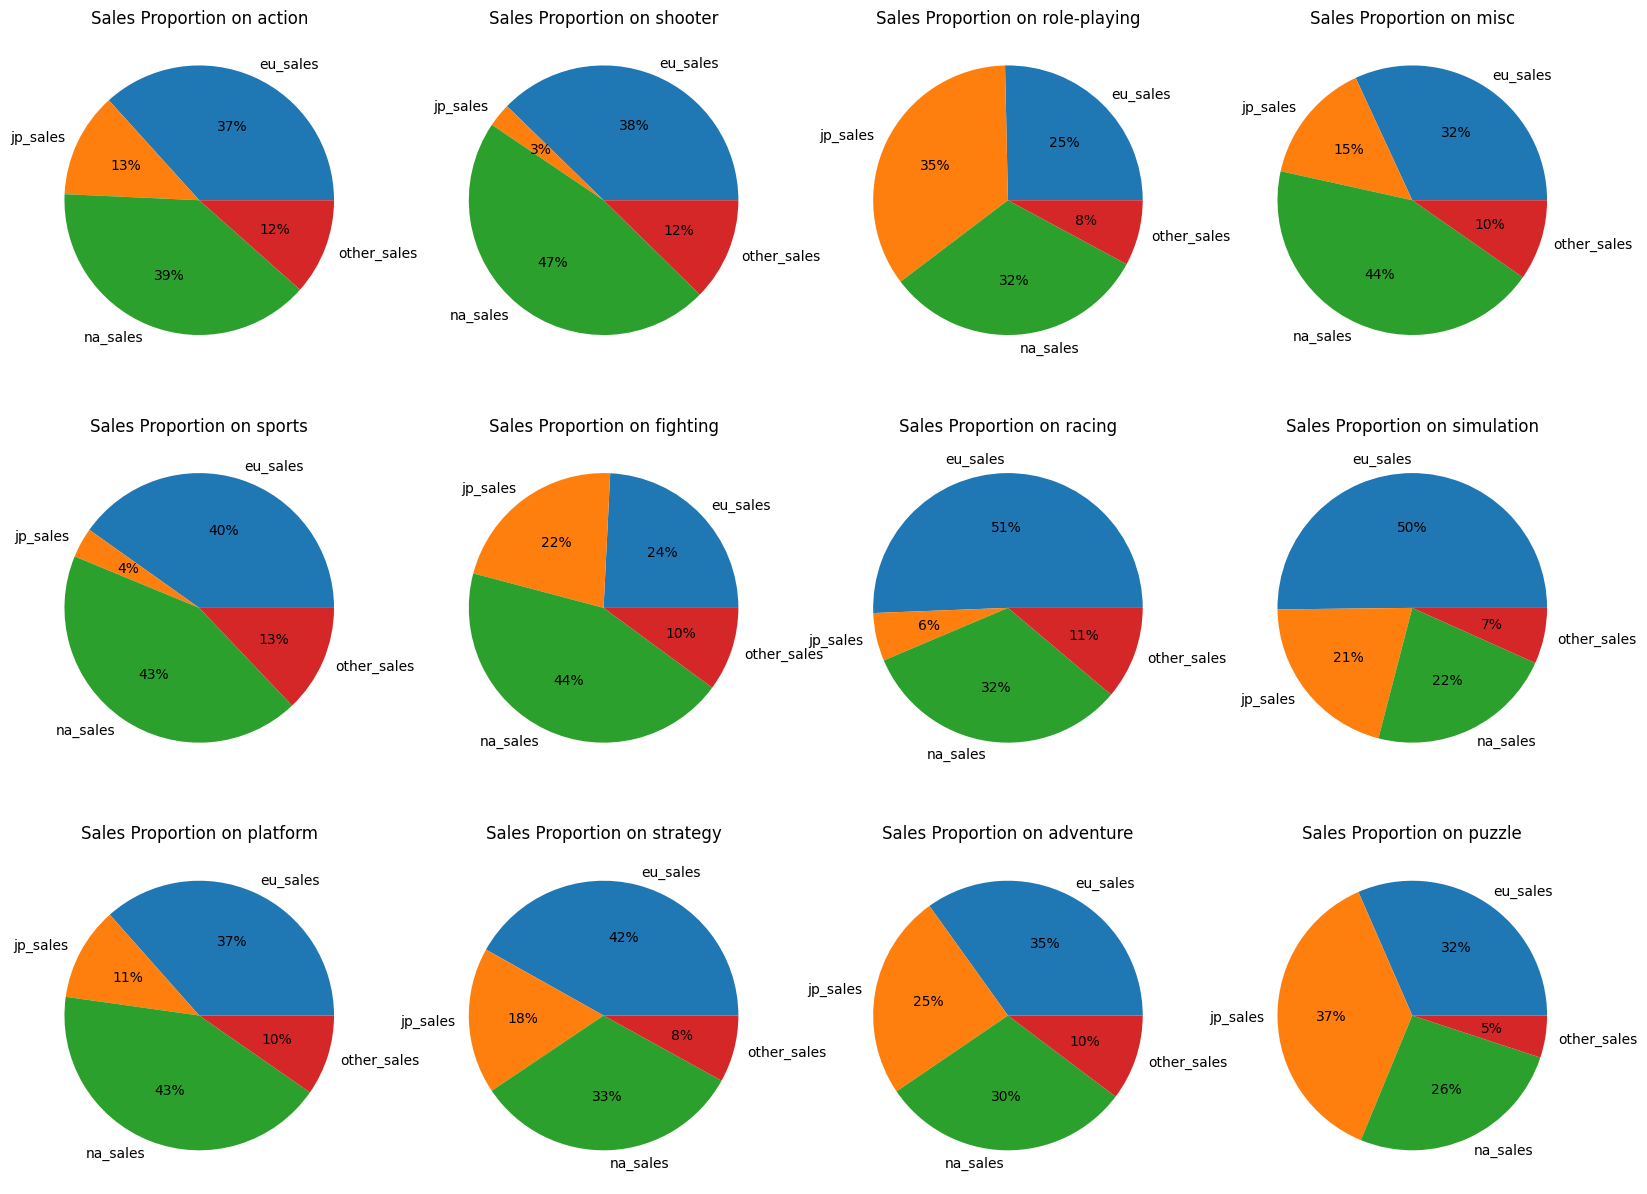

In [75]:
i = 1
plt.figure(figsize=(20, 15))

# Membuat pie chart
for genre in genres:
    plt.subplot(3, 4, i)
    plt.title(f'Sales Proportion on {genre}')
    plt.pie(genre_sales[genre], labels=genre_sales['index'], autopct='%.0f%%')
    i = i + 1 
    
plt.show()

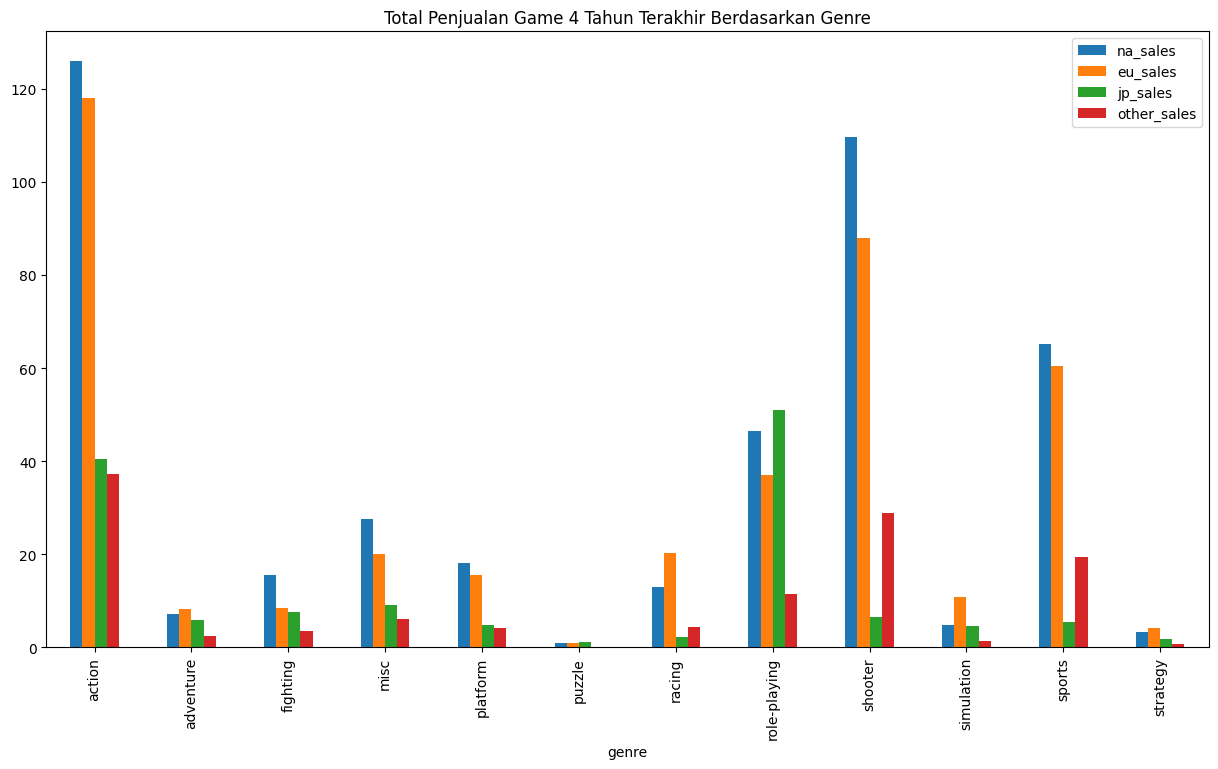

In [76]:
# Membuat barplot

# Membuat dataset
genre_barplot = latest_game.groupby(['genre'])['na_sales', 'eu_sales','jp_sales', 'other_sales'].sum()

# Menampilkan barplot
genre_barplot.plot(kind='bar', figsize=(15, 8));
plt.title('Total Penjualan Game 4 Tahun Terakhir Berdasarkan Genre')
plt.show()

**Findings:**

- 5 genre teratas dalam 4 tahun terakhir secara berurutan dari peringkat satu adalah `action`, `shooter`, `sports`, `role-playing`, dan `misc`.
- Penjualan tertinggi di genre `action` berasal dari wilayah Amerika Utara, yaitu sebesar 37%. Namun ada perbedaan penjualan yang cukup tipis dengan wilayah Eropa sebesar 37%.
- Penjualan tertinggi di genre `shooter` berasal dari wilayah Amerika Utara, yaitu sebesar 47%.
- Penjualan tertinggi di genre `sports` berasal dari wilayah Amerika Utara, yaitu sebesar 43%. Namun ada perbedaan penjualan yang cukup tipis dengan wilayah Eropa sebesar 40%.
- Penjualan tertinggi di genre `role-playing` berasal dari wilayah Jepang, yaitu sebesar 35%.
- Penjualan tertinggi di genre `misc` berasal dari wilayah Amerika Utara, yaitu sebesar 44%.

**Insights:**

- Genre yang diminati di wilayah Eropa adalah `action` dan `sports`.
- Genre yang diminati di wilayah Amerika Utara adalah `action`, `shooter`, `sports`, dan `misc`.
- Genre yang diminati di wilayah Jepang adalah `role-playing`.

**Recomendation:**

- Jika akan merilis game di wilayah Eropa, maka `action` dan `sports` adalah genre yang tepat.
- Jika akan merilis game di wilayah Amerika Utara, maka `action`, `shooter`, `sports`, dan `misc` adalah genre yang tepat.
- Sedangkan jika akan merilis game di wilayah Jepang, maka `role-playing` adalah genre yang tepat.

### ESRB Rating <a id='profile3'></a>

In [77]:
# Membuat List rating

ratings = latest_game['rating'].unique()
ratings = ratings[~pd.isnull(ratings)]
ratings

array(['M', 'E', 'T', 'E10+'], dtype=object)

In [78]:
# Membuat pivot table yang berisikan informasi rating dan nilai penjualannya di tiap wilayah

rating_sales = pd.pivot_table(latest_game, index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum').T.reset_index()
rating_sales

rating,index,E,E10+,M,T
0,eu_sales,83.36,42.69,145.32,41.95
1,jp_sales,15.14,5.89,14.11,20.59
2,na_sales,79.05,54.24,165.21,49.79
3,other_sales,22.61,12.57,47.04,14.29


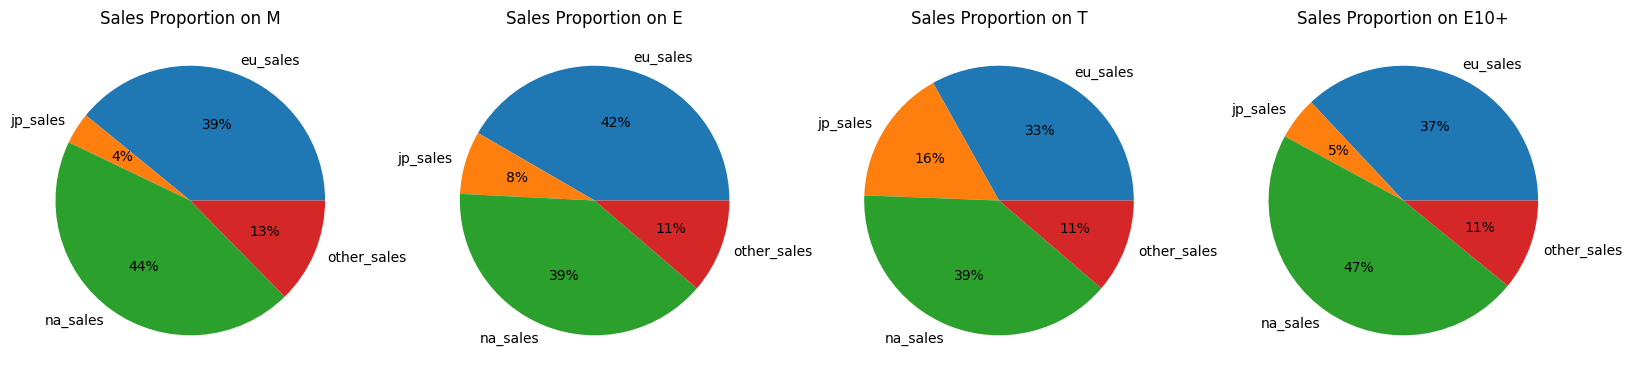

In [79]:
i = 1
plt.figure(figsize=(20, 15))

# Membuat pie chart
for rating in ratings:
    plt.subplot(1, 4, i)
    plt.title(f'Sales Proportion on {rating}')
    plt.pie(rating_sales[rating], labels=rating_sales['index'], autopct='%.0f%%')
    i = i + 1 

plt.show()

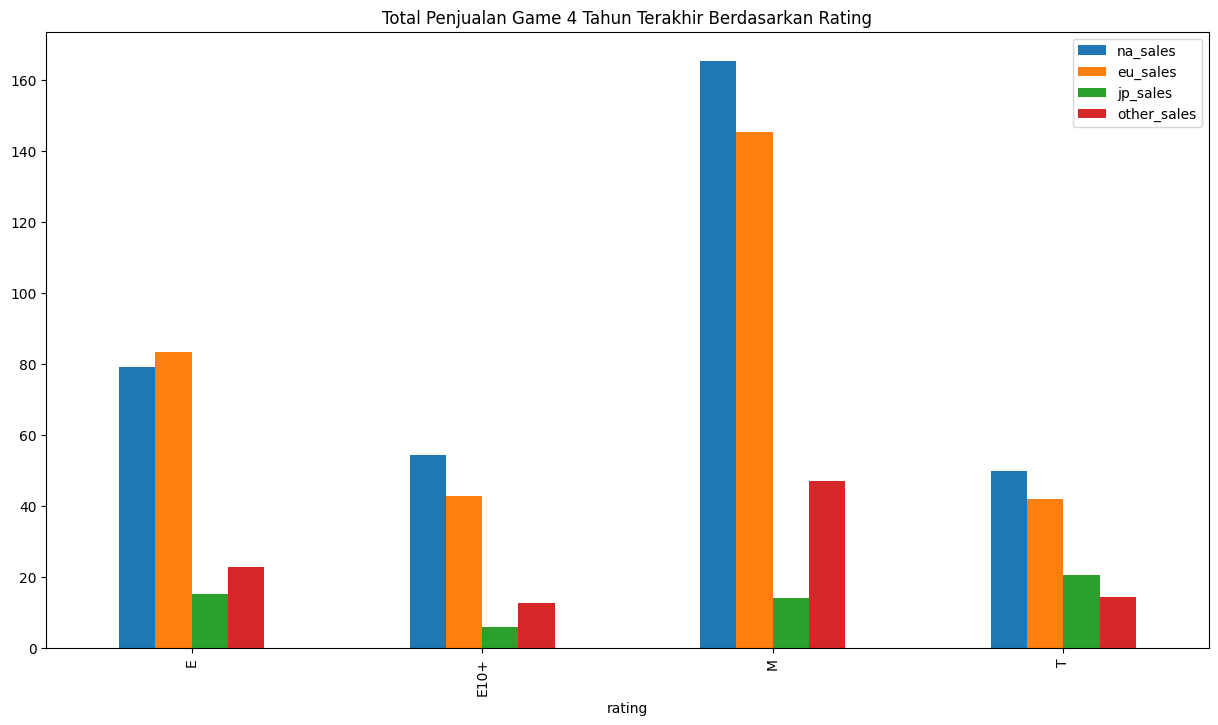

In [80]:
# Membuat barplot

# Membuat dataset
rating_barplot = latest_game.groupby(['rating'])['na_sales', 'eu_sales','jp_sales', 'other_sales'].sum()

# Menampilkan barplot
rating_barplot.plot(kind='bar', figsize=(15, 8));
plt.title('Total Penjualan Game 4 Tahun Terakhir Berdasarkan Rating')
plt.show()

**Findings:**

- Penjualan tertinggi di rating `M` atau `MATURE 17+` berasal dari wilayah Amerika Utara, yaitu sebesar 44%. Dan penjualan terendah berada di wilayah Jepang, yaitu hanya sebanyak 4%.
- Penjualan tertinggi di rating `E` atau `EVERYONE` berasal dari wilayah Eropa, yaitu sebesar 42%. Dan penjualan terendah berada di wilayah Jepang, yaitu hanya sebanyak 8%.
- Penjualan tertinggi di rating `T` atau `TEEN` berasal dari wilayah Amerika Utara, yaitu sebesar 39%. Dan penjualan terendah berada di wilayah Jepang, yaitu sebanyak 16%.
- Penjualan tertinggi di rating `E10+` atau `EVERYONE 10+` berasal dari wilayah Amerika Utara, yaitu sebesar 47%. Dan penjualan terendah berada di wilayah Jepang, yaitu hanya sebanyak 5%.

**Insights:**

- Penjualan game dari keempat rating sangat kecil di wilayah Jepang.
- Game dengan rating `M`, `T`, dan `E10+` menghasilkan sebagian penjualan yang berasal dari wilayah Amerika Utara.
- Game dengan rating `E` menghasilkan sebagian penjualan yang berasal dari wilayah Eropa.

**Recomendation:**

- Jika akan merilis game di wilayah Eropa, maka rating `E` adalah rating yang perlu dipertimbangkan.
- Jika akan merilis game di wilayah Amerika Utara, maka `M`, `T`, dan `E10+` adalah rating yang perlu dipertimbangkan.

## Tahap 6: Menguji Hipotesis <a id='hip'></a>

Terdapat dua hipotesis yang perlu diuji:

- Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
- Rata-rata rating pengguna genre Action dan Sports berbeda.

### Hipotesis 1 <a id='hip1'></a>

- H0 (Null Hypothesis) = Rata-rata rating pengguna platform `Xbox One` dan `PC` **SAMA**.
- H1 (Alternative Hypothesis) = Rata-rata rating pengguna platform `Xbox One` dan `PC` **TIDAK SAMA**.

Sebelum menguji hipotesisnya, perlu dipastikan apakah masih ada nilai yang hilang:

In [81]:
latest_game.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1242
user_score         1041
rating              977
total_sales           0
dtype: int64

In [82]:
latest_game.shape

(2233, 12)

Terdapat beberapa nilai yang hilang pada kolom `critic_score`, `user_score`, dan `rating`. Namun karena hipotesis yang akan diuji hanya berkaitan dengan `user_score`, maka hanya perlu memfilter nilai yang hilang pada kolom tersebut.

In [83]:
user_score_clean = latest_game[~(latest_game['user_score'].isna())].reset_index(drop=True)

In [84]:
user_score_clean.isna().sum()

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       216
user_score           0
rating              42
total_sales          0
dtype: int64

In [85]:
user_score_clean.shape

(1192, 12)

Selanjutnya perlu dibuat dataframe baru berdasarkan jenis platformnya masing-masing, yaitu `PC` dan `XOne`.

In [86]:
# Membuat dataset platfrom 'PC'
game_pc = user_score_clean[(user_score_clean['platform'] == 'pc')].reset_index(drop=True)

# Membuat dataset platform 'XOne'
game_xone = user_score_clean[(user_score_clean['platform'] == 'xone')].reset_index(drop=True)

`alpha` = `0.05` akan digunakan karena analisa kali ini tidak memerlukan ketelitian yang tinggi.

In [87]:
alpha = 0.05

Memastikan apakah variannya sama atau tidak:

In [88]:
# Memeriksa varian dengan levene test

p_value_levene = st.levene(game_xone['user_score'], game_pc['user_score'])

print('p-value: ', p_value_levene.pvalue)
if p_value_levene.pvalue < alpha:
    print('Varian sample 1 dan sample 2 adalah tidak sama')
else:
    print('Varian sample 1 dan sample 2 adalah sama') 

p-value:  0.0038975531101303022
Varian sample 1 dan sample 2 adalah tidak sama


Varian sample 1 dan sample 2 tidak sama, dengan begitu `equal_var` dapat diset dengan nilai `False`.

In [89]:
# Melakukan t-test

results = st.ttest_ind(game_xone['user_score'], game_pc['user_score'], equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Kita menolak hipotesis nol')
else:
    print('Kita tidak dapat menolak hipotesis nol') 

p-value:  0.14759594013430463
Kita tidak dapat menolak hipotesis nol


H0 (Null Hypothesis) diterima, artinya rata-rata rating pengguna platform `Xbox One` dan `PC` adalah **SAMA**.

### Hipotesis 2 <a id='hip2'></a>

- H0 (Null Hypothesis) = Rata-rata rating pengguna genre `Action` dan `Sports` **SAMA**.
- H1 (Alternative Hypothesis) = Rata-rata rating pengguna genre `Action` dan `Sports` **TIDAK SAMA**.

Menggunakan dataset yang sudah difilter, akan dibuat dataset baru berdasarkan genre `action` dan `sports`:

In [90]:
# Membuat dataset genre 'action'
game_action = user_score_clean[(user_score_clean['genre'] == 'action')].reset_index(drop=True)

# Membuat dataset genre 'sports'
game_sports = user_score_clean[(user_score_clean['genre'] == 'sports')].reset_index(drop=True)

Sama seperti sebelumnya, `alpha` = `0.05` akan digunakan karena analisa kali ini tidak memerlukan ketelitian yang tinggi.

In [91]:
alpha = 0.05

Memastikan apakah variannya sama atau tidak:

In [92]:
# Memeriksa varian dengan levene test

p_value_levene = st.levene(game_sports['user_score'], game_action['user_score'])

print('p-value: ', p_value_levene.pvalue)
if p_value_levene.pvalue < alpha:
    print('Varian sample 1 dan sample 2 adalah tidak sama')
else:
    print('Varian sample 1 dan sample 2 adalah sama') 

p-value:  4.256668821827404e-07
Varian sample 1 dan sample 2 adalah tidak sama


Varian sample 1 dan sample 2 tidak sama, dengan begitu `equal_var` dapat diset dengan nilai `False`.

In [93]:
# Melakukan t-test

results = st.ttest_ind(game_sports['user_score'], game_action['user_score'], equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Kita menolak hipotesis nol')
else:
    print('Kita tidak dapat menolak hipotesis nol') 

p-value:  1.4460039700704318e-20
Kita menolak hipotesis nol


H0 (Null Hypothesis) ditolak, artinya rata-rata rating pengguna genre `Action` dan `Sports` **TIDAK SAMA**.

## Kesimpulan Umum <a id='end'></a>

*Dataset* yang dianalisa terkait ulasan pengguna dan ahli game, genre, platform (misalnya Xbox atau PlayStation), dan data historis penjualan game tersedia dari sumber terbuka. Pada Tahap 3: Pra-pemrosesan Data, beberapa permasalahan data telah diperbaiki seperti merubah nama dan nilai kolom menjadi huruf kecil, menghapus sebagian nilai yang hilang, merubah niai `tbd` dalam kolom `user_score` menjadi `NaN`, dan memperbaiki tipe data yang belum sesuai.

Tujuan utama adalah mengidentifikasi pola-pola yang menentukan apakah suatu game dapat dikatakan berhasil atau tidak, sehingga  dapat ditemukan game yang paling berpotensial dan merencanakan kampanye iklannya. Untuk menjawab pertanyaan tersebut penting untuk mengetahui beberapa hal berikut:

1. Berapa banyak game yang dirilis setiap tahunnya.
2. Distribus penjualan dari satu platform ke platform lainnya.
3. Platform yang dulu populer namun sekarang sudah tidak lagi populer dan usia rata-rata suatu platform.
4. Platform yang memiliki potensi.
5. penjualan rata-rata global berbagai platform.
6. Korelasi ulasan terhadap penjualan.
7. Genre yang paling menguntungkan.
8. Pemprofilan pengguna.

Selanjutnya perlu juga dilakukan pengujian **hipotesis** berikut:

1. Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
2. Rata-rata rating pengguna genre Action dan Sports berbeda.

Setelah menganalisis datanya, dapat disimpulkan bahwa:

1. Berapa banyak game yang dirilis setiap tahunnya:
    - 1980 menjadi tahun dengan jumlah rilis game paling sedikit, yaitu hanya 9 judul game.
    - Sedangkan tahun dengan jumlah rilis game paling banyak adalah pada tahun 2009 dengan 1427 judul game.
    - Namun hingga tahun 2016 terjadi penurunan jumlah rilis tahunan menjadi hanya 502 judul game. 

2. Distribus penjualan dari satu platform ke platform lainnya:
    - `ps2` merupakan platform dengan total penjualan tertinggi, sedangkan `pcfx` menjadi platform dengan total penjualan yang paling rendah diantara platform lainnya.


3. Platform yang dulu populer namun sekarang sudah tidak lagi populer dan usia rata-rata suatu platform:
    - `ps2`, `ps`, `ds`, `gba`, `psp`, `gb`, `xb`, `gc`, `n64`, `nes` dan, `snes` merupakan platform yang dulu populer namun sekarang sudah punah. 
    - Rata-rata usia platform adalah 10 tahun.


4. Platform yang memiliki potensi:
    - `ps4`, `ps3`, dan `xone` menjadi platform yang paling berpotensi menghasilkan keuntungan.
    - `wii`, `psp`, dan `ds` merupakan platform yang perkembangannya negatif atau menyusut.


5. penjualan rata-rata global berbagai platform:
    - Platform `gb` menghasilkan rata-rata penjualan paling besar yaitu sekitar 2.62 juta USD.
    - `pcfx` menghasilkan rata-rata penjualan terendah dengan total penjualan hanya sebesar 0.03 juta USD.


6. Korelasi ulasan terhadap penjualan:
    - Ulasan pengguna tidak mempengaruhi penjualan sama sekali.
    - Ulasan kritikus sedikit berpengaruh terhadap penjualan suatu game.


7. Genre yang paling menguntungkan:
    - Genre `action` menjadi genre paling populer.
    - Meskipun genre `shooter` tidak memiliki judul game sebanyak genre `action`, tetapi nilai penjualnnya tidak kalah menarik.


8. Pemprofilan pengguna:

 a. Platform Teratas:
    
    - Platform yang diminati di wilayah Eropa adalah `PS4` dan `PS3`.
    - Platform yang diminati di wilayah Amerika Utara adalah `XOne` dan `X360`.
    - Platform yang diminati di wilayah Jepang adalah `3DS`.

 b. Genre Teratas:
    
    - Genre yang diminati di wilayah Eropa adalah `action` dan `sports`.
    - Genre yang diminati di wilayah Amerika Utara adalah `action`, `shooter`, `sports`, dan `misc`.
    - Genre yang diminati di wilayah Jepang adalah `role-playing`.
    
 c. Rating Teratas:
    
    - Penjualan game dari keempat rating sangat kecil di wilayah Jepang.
    - Game dengan rating `M`, `T`, dan `E10+` menghasilkan sebagian penjualan yang berasal dari wilayah Amerika Utara.
    - Game dengan rating `E` menghasilkan sebagian penjualan yang berasal dari wilayah Eropa.

Dan setalah dilakukan pengujian hipotesis menggunakan T-test dengan `alpha` = `0.05`, dapat disimpulkan sebagai berikut:

- Hipotesis pertama dapat diterima karena berdasarkan T-test yang dilakukan bahwa rata-rata rating pengguna platform `Xbox One` dan `PC` sama.
- Berdasarkan T-test, hipotesis kedua juga dapat diterima yaitu rata-rata rating pengguna genre `Action` dan `Sports` berbeda.

[Kembali ke Daftar Isi](#back)